# Smart Credit Risk Modelling

------

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Rakamin/loan_data_2007_2014.csv'
data = pd.read_csv(file_path)

<ipython-input-123-c5987bbe31fc>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('shape of the data:' , data.shape)

shape of the data: (466285, 75)


### Memeriksa apakah setiap baris dalam data mewakili satu individu

In [ ]:
jumlah_baris = data['id'].nunique()
jumlah_unik = data['member_id'].nunique()

if jumlah_baris == jumlah_unik:
    print("Setiap baris mewakili satu individu.")
else:
    print("ada duplikat")

Setiap baris mewakili satu individu.


## Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Feature Engineering

### Drop Kolom yang tidak digunakan

In [ ]:
# kolom yang akan di drop
cols_to_drop = [
    # unique id
    'Unnamed: 0',
    'id',
    'member_id',

    # free text
    'url',
    'desc',

    # all null / constant / others
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',

    # expert judgement
    'sub_grade'


]

In [ ]:
# menghapus kolom-kolom yang terdaftar dalam cols_to_drop
data.drop(cols_to_drop, axis = 1 , inplace = True)

# menampilkan informasi dataset setelah penghapusan kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

### Defining Target Variable

In [ ]:
# menghitung presentase distribusi nilai dalam kolom 'loan_status'
# untuk mendapatkan proporsi nilai dalam bentuk presentase
presentase_loan_status = data.loan_status.value_counts(normalize = True) * 100

# Menampilkan presentase distribusi nilai dalam kolom 'loan_status'
print(presentase_loan_status)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


In [ ]:
# daftar status pembayaran yang dianggap sebagai 'bad_status'
bad_status = ['Charged Off' , 'Late (31-120 days)' , 'Default' , 'Does not meet the credit policy. Status:Charged Off']

# menambahkan kolom 'bad_flag' sebagai penanda dua kategori
data['bad_flag'] = np.where(data['loan_status'].isin(bad_status) , 1 , 0)

In [ ]:
# menghitung persentase distribusi nilai dalam kolom 'bad_flag'
persentase_bad_flag = data['bad_flag'].value_counts(normalize=True) * 100
print(persentase_bad_flag)

bad_flag
0    89.069346
1    10.930654
Name: proportion, dtype: float64


In [ ]:
# menghapus kolom asli 'loan_status'
data.drop('loan_status' , axis = 1 , inplace = True)

### Data Cleaning

pada segmen ini saya akan melakukan cleaning dengan cara memanipulasi data dengan format yang dapat diproses selanjutnya . penting untuk melihat bahwa proses ini harus dilakukan detail dan teliti karena mungkin saja ada kasus yang tidak bisa kita hindari memerlukan perlakuan khusus

**column : emp_length**

In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# Menghapus karakter non-numeric, menangani "< 1 year", dan mengonversi ke float
data['emp_length_int'] = (data['emp_length']
                          .str.replace(r'\D+', '', regex=True)  # Hapus semua non-digit
                          .replace('', '0')  # Ganti string kosong menjadi '0'
                          .astype(float))  # Konversi ke float

print(data)

        loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0            5000         5000           4975.0   36 months     10.65   
1            2500         2500           2500.0   60 months     15.27   
2            2400         2400           2400.0   36 months     15.96   
3           10000        10000          10000.0   36 months     13.49   
4            3000         3000           3000.0   60 months     12.69   
...           ...          ...              ...         ...       ...   
466280      18400        18400          18400.0   60 months     14.47   
466281      22000        22000          22000.0   60 months     19.97   
466282      20700        20700          20700.0   60 months     16.99   
466283       2000         2000           2000.0   36 months      7.90   
466284      10000        10000           9975.0   36 months     19.20   

        installment grade                              emp_title emp_length  \
0            162.87     B                   

In [ ]:
data.drop('emp_length', axis = 1 , inplace = True)

**Column : Term**

In [ ]:
#menampilkan nilai unik dari kolom 'term'
unique_terms = data['term'].unique()
unique_terms

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data['term_int'] = data['term'].str.replace(' months','').astype(float)

In [ ]:
data['term_int']

,term_int
0,36.0
1,60.0
2,36.0
3,36.0
4,60.0
...,...
466280,60.0
466281,60.0
466282,60.0
466283,36.0


In [ ]:
data.drop('term' , axis = 1 , inplace = True)

**Column : earliest_cr_line**

In [ ]:
data['earliest_cr_line'].head()

,earliest_cr_line
0,Jan-85
1,Apr-99
2,Nov-01
3,Feb-96
4,Jan-96


In [ ]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'] , format='%b-%y')

In [ ]:
# menghitung jumlah bulan sejak 'earliest_cr_line' hingga tanggal referensi
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'D'))) / 30.4375 # Divide by the average number of days in a month

In [ ]:
data['mths_since_earliest_cr_line'].describe()

,mths_since_earliest_cr_line
count,466256.000000
mean,239.490812
std,93.974818
min,-612.008214
25%,182.997947
50%,225.051335
75%,285.043121
max,586.973306


In [ ]:
# menampilkan baris dengan nilia 'mths_since_earliest_cr_line' yang kurang dari 0
print(data[data['mths_since_earliest_cr_line']< 0][['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']].head())

     earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                  -537.002053
1770           Sep-68            2068-09-01                  -609.018480
2799           Sep-64            2064-09-01                  -561.018480
3282           Sep-67            2067-09-01                  -596.993840
3359           Feb-65            2065-02-01                  -566.045175


perhatikan bahwa disini terdapat keanehan yang memperlihatkan bahwa nilai dari mths_since_earliest_cr_line bernilai negatif , setelah saya lihat ternyata nilia negatif muncul karena **fungsi python salah menginterpretasikan tahun 62 menjadi tahun 2062 padahal harusnya tahun 1962** .

untuk mengatasi hal ini , dapat dilakukan preprocessing lebih lanjut jika ingin melakukan pembenaran terhadap kolom tersebut . namun , disini saya mengubah nilai yang negatif menjadi nilai maksimum dari fitur tersebut karena artinya disini data sudah sangat tua .

In [ ]:
# mengganti nilai 'mths_since_earliest_cr_line' yang kurang dari 0 dengan nilai maksimum
data.loc[data['mths_since_earliest_cr_line'] < 0,'mths_since_earliest_cr_line']= data['mths_since_earliest_cr_line'].max()

In [ ]:
data.drop(['earliest_cr_line','earliest_cr_line_date'],axis = 1, inplace = True)

**Column : issue_d**

In [ ]:
# mengonversi 'issue_d' menjadi format tanggal
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')

In [ ]:
#menghitung jumlah bulan sejak 'issue_d' hingga tanggal referensi
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'D'))) / 30.4375 # Divide by the average number of days in a month

In [ ]:
data['mths_since_issue_d'].describe()

,mths_since_issue_d
count,466285.000000
mean,51.264123
std,14.338370
min,36.008214
25%,41.034908
50%,46.981520
75%,57.034908
max,126.028747


In [ ]:
# menghapus kolom 'issue_d' dan 'issue_d_date'
data.drop(['issue_d','issue_d_date'], axis =1 , inplace = True)

**Column : last_pymnt_d**

In [ ]:
# mengonversi 'last_pymnt_d' menjadi format tanggal
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format = '%b-%y')

In [ ]:
# menghitung jumlah bulan sejak 'last_pymnt_d' hingga tanggal referensi
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'D'))) / 30.4375

In [ ]:
data.drop(['last_pymnt_d','last_pymnt_d_date'], axis =1 , inplace = True)

**Column : next_pymnt_d**

In [ ]:
# Mengonversi 'next_pymnt_d' menjadi format tanggal
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')

# Menghitung jumlah bulan sejak 'next_pymnt_d' hingga tanggal referensi
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'D'))) / 30.4375

# Menghapus kolom 'next_pymnt_d' dan 'next_pymnt_d_date' yang sudah tidak diperlukan
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

**Column : last_credit_pull_d**

In [ ]:
# Mengonversi 'last_credit_pull_d' menjadi format tanggal
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')

# Menghitung jumlah bulan sejak 'last_credit_pull_d' hingga tanggal referensi
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'D')) / 30.4375)

# Menghapus kolom 'last_credit_pull_d' dan 'last_credit_pull_d_date' yang sudah tidak diperlukan
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [ ]:
non_numeric_data = data.select_dtypes(exclude=['number'])
print(non_numeric_data.head())

  grade                 emp_title home_ownership verification_status  \
0     B                       NaN           RENT            Verified   
1     C                     Ryder           RENT     Source Verified   
2     C                       NaN           RENT        Not Verified   
3     C       AIR RESOURCES BOARD           RENT     Source Verified   
4     B  University Medical Group           RENT     Source Verified   

  pymnt_plan         purpose                 title addr_state  \
0          n     credit_card              Computer         AZ   
1          n             car                  bike         GA   
2          n  small_business  real estate business         IL   
3          n           other              personel         CA   
4          n           other              Personal         OR   

  initial_list_status application_type  
0                   f       INDIVIDUAL  
1                   f       INDIVIDUAL  
2                   f       INDIVIDUAL  
3           

# Exploratory Data Analysis

### correlation heatmap

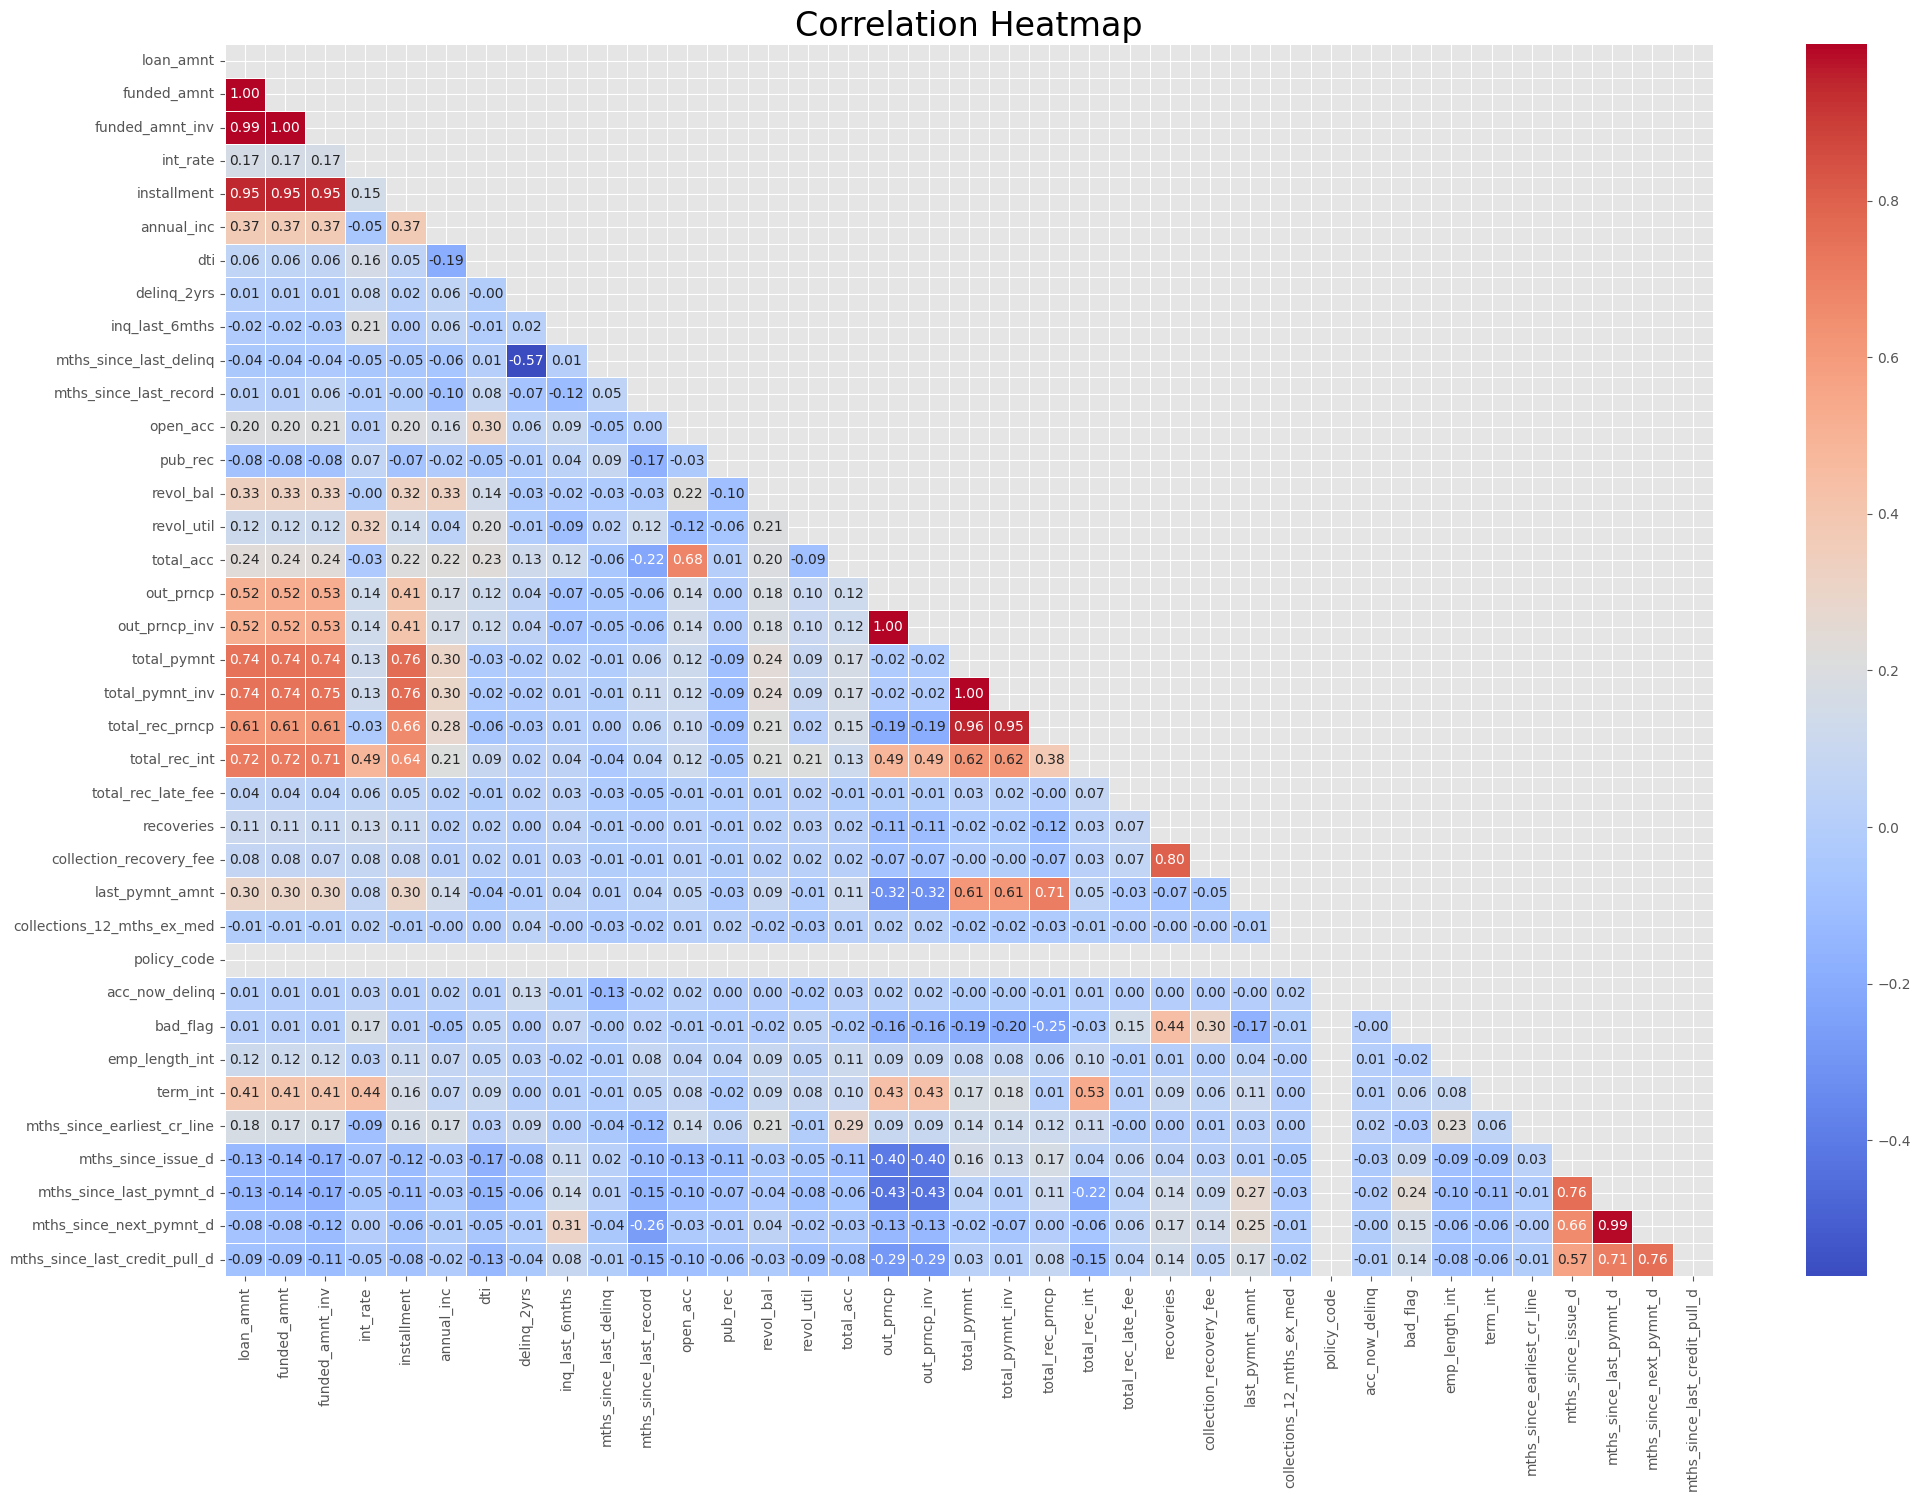

In [ ]:
# Memilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['number'])

# Menghitung matriks korelasi
corr_matrix = numeric_data.corr()

# Mengambil segitiga atas dari matriks korelasi
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Membuat heatmap
plt.figure(figsize=(24, 16))  # Ukuran plot
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Heatmap', fontsize=24)

# Menampilkan plot
plt.show()

### Check cardinality data

#### Categorical data

In [ ]:
# menampilkan jumlah nilai unik dari fitur fitur dengan tipe data objek
data.select_dtypes(include='object').nunique()

,0
grade,7
emp_title,205475
home_ownership,6
verification_status,3
pymnt_plan,2
purpose,14
title,63098
addr_state,50
initial_list_status,2
application_type,1


kita akan menghapus 2 fitur karena memiliki nilai unik yang sangat banyak sehingga tidak ada nya pola yang cukup signifikan untuk diproses dan satu fitur yaitu application_type yang hanya memiliki satu nilai unik

In [ ]:
# menghapus tiga fitur
data.drop(['emp_title','title','application_type'], axis =1 , inplace = True)

#### Numerical data

In [ ]:
data.select_dtypes(exclude='object').nunique()

,0
loan_amnt,1352
funded_amnt,1354
funded_amnt_inv,9854
int_rate,506
installment,55622
annual_inc,31901
dti,3997
delinq_2yrs,24
inq_last_6mths,28
mths_since_last_delinq,145


In [ ]:
# menghapus fitur 'policy_code'
data.drop(['policy_code'],axis =1, inplace = True)

In [ ]:
# loop melalui setiap fitur dengan tipe data objek
for col in data.select_dtypes(include='object').columns.tolist() :
  # menampilkan distribusi nilai unik dari setiap fitur
  print('Distribusi nilai unik untuk fitur',col)
  print(data[col].value_counts(normalize = True)*100)
  print('\n')

Distribusi nilai unik untuk fitur grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur purpose
purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.1

perhatikan bahwa pymnt plan disini didominasi oleh satu nilai secara signifikan sehingga kita harus menghapus kolom 'pymnt_plan' . hal ini dilakukan untuk menghilangkan fitur yang tidak memberikan variasi atau informasi tambahan dalam proses pemodelan

In [ ]:
# menghapus fitur 'pymnt_plan'
data.drop('pymnt_plan', axis =1 , inplace = True)

### Univariate Analysis

#### categorical data

In [ ]:
cat_var = data.select_dtypes(include = ['object']).columns
cat_var

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


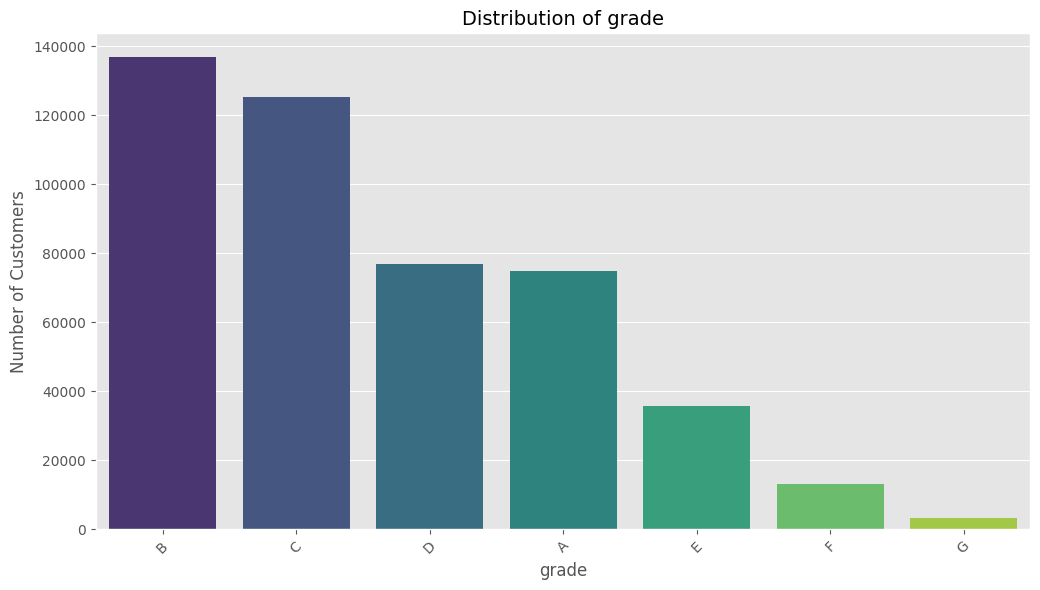

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


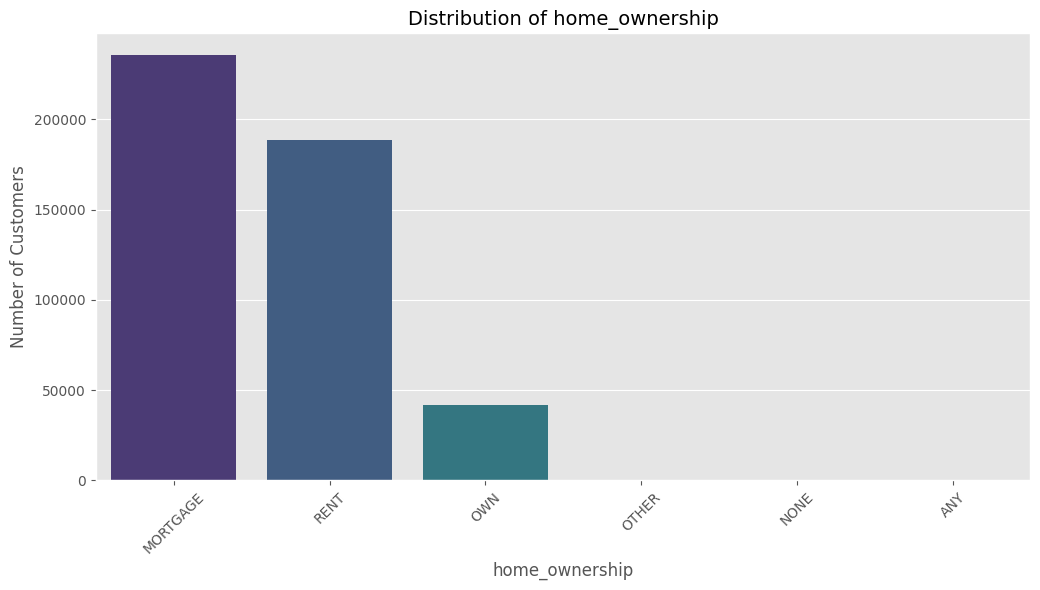

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


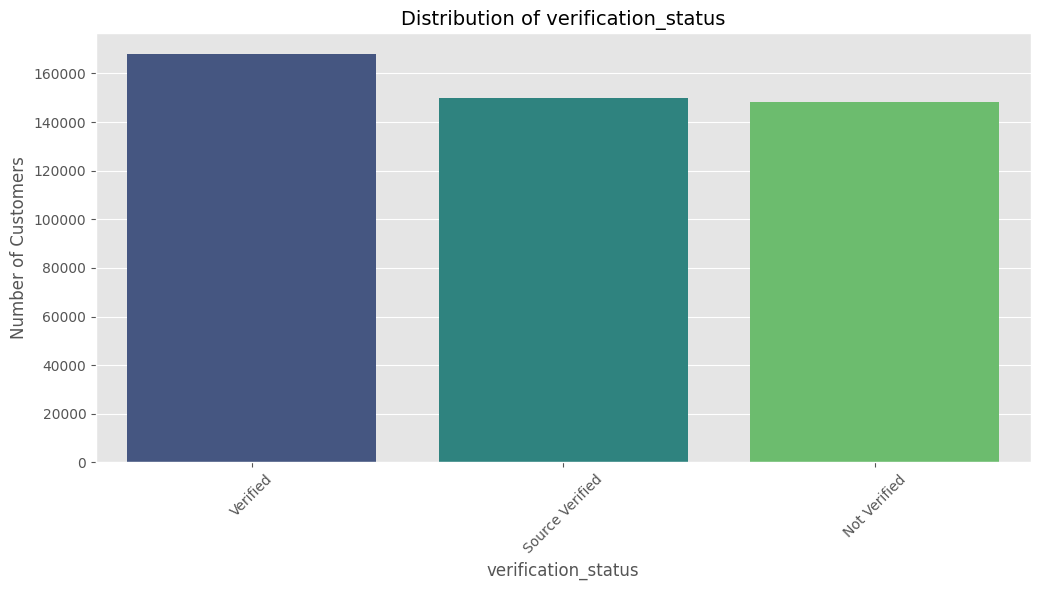

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


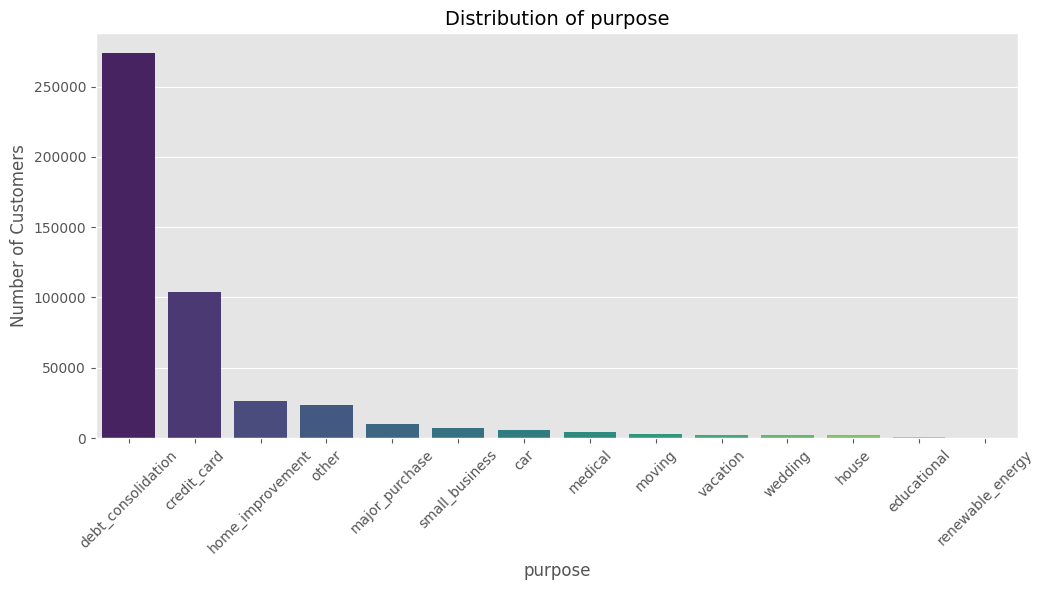

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


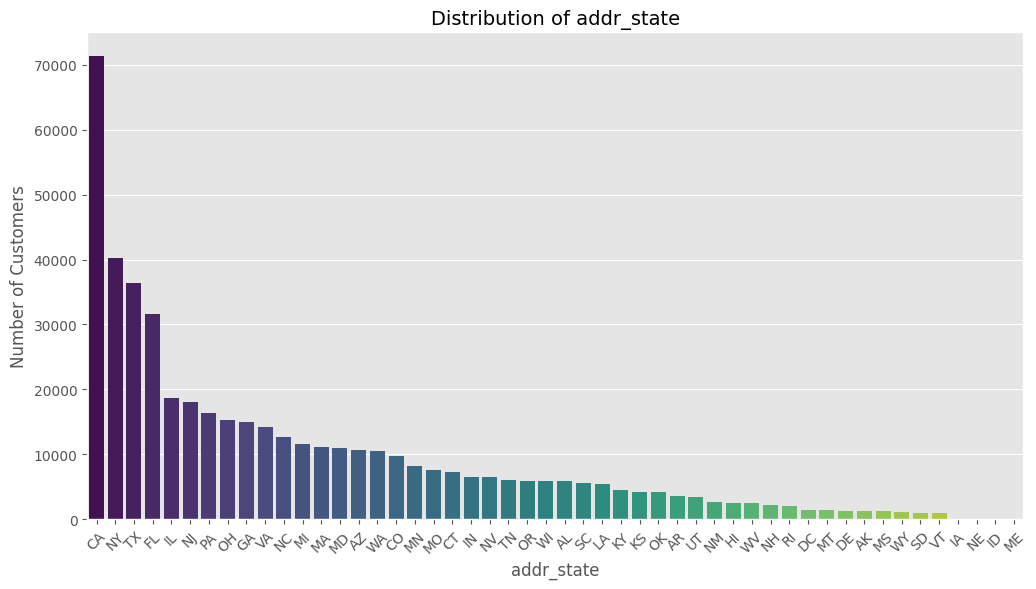

<ipython-input-166-8faebbec1c58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')


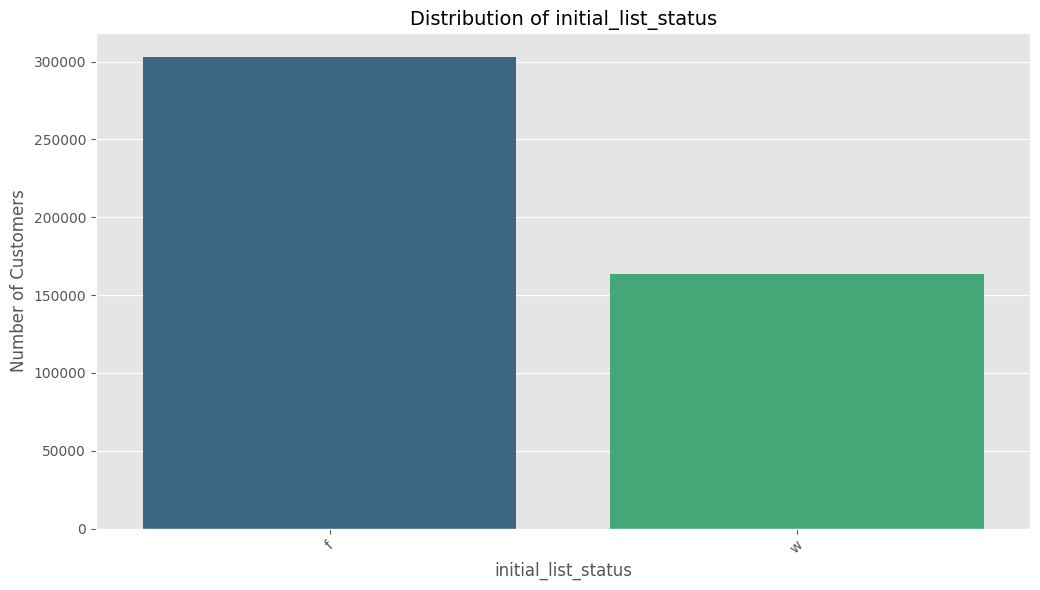

In [ ]:
# Menggunakan style 'ggplot' untuk plot
plt.style.use('ggplot')

# Looping melalui setiap kolom kategorikal
for column in cat_var:
    # Membuat figure dengan ukuran yang lebih lebar
    plt.figure(figsize=(20, 6))

    # Plot 1: Bar plot untuk value counts
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
    sns.countplot(x=data[column], order=data[column].value_counts().index, palette='viridis')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xticks(rotation=45)  # Memutar label x-axis agar lebih mudah dibaca

    # # Plot 2: Pie chart untuk proporsi
    # plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
    # data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
    # plt.ylabel('')  # Menghilangkan label y-axis
    # plt.title(f'Proportion of {column}', fontsize=14)

    # Menampilkan plot
    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

#### Numerical data

In [ ]:
# numerical variables
num_var = data.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,0.0,0.0,0,10.0,36.0,394.973306,72.016427,34.989733,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,0.0,0.0,1,1.0,60.0,224.032854,72.016427,56.016427,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,0.0,0.0,0,10.0,36.0,192.985626,72.016427,42.020534,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0.0,0.0,0,10.0,36.0,261.979466,72.016427,34.989733,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,0.0,0.0,0,1.0,60.0,262.997947,72.016427,22.997947,21.979466,23.0


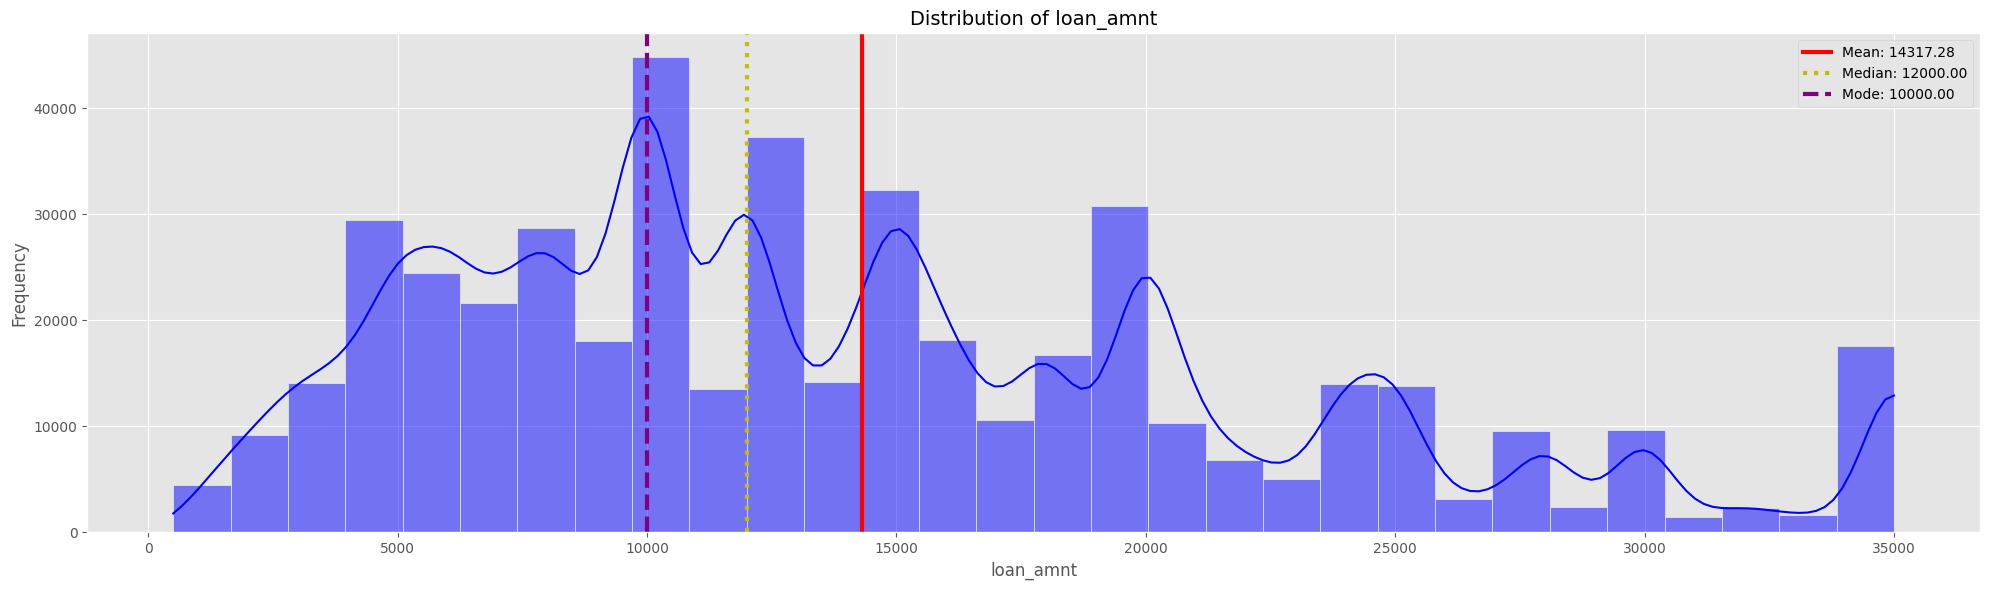

Ringkasan statistik dari loan_amnt:
Rata-rata: 14317.28
Standar deviasi: 8286.51
Median: 12000.00
Mode: 10000.00
----------------------------------------


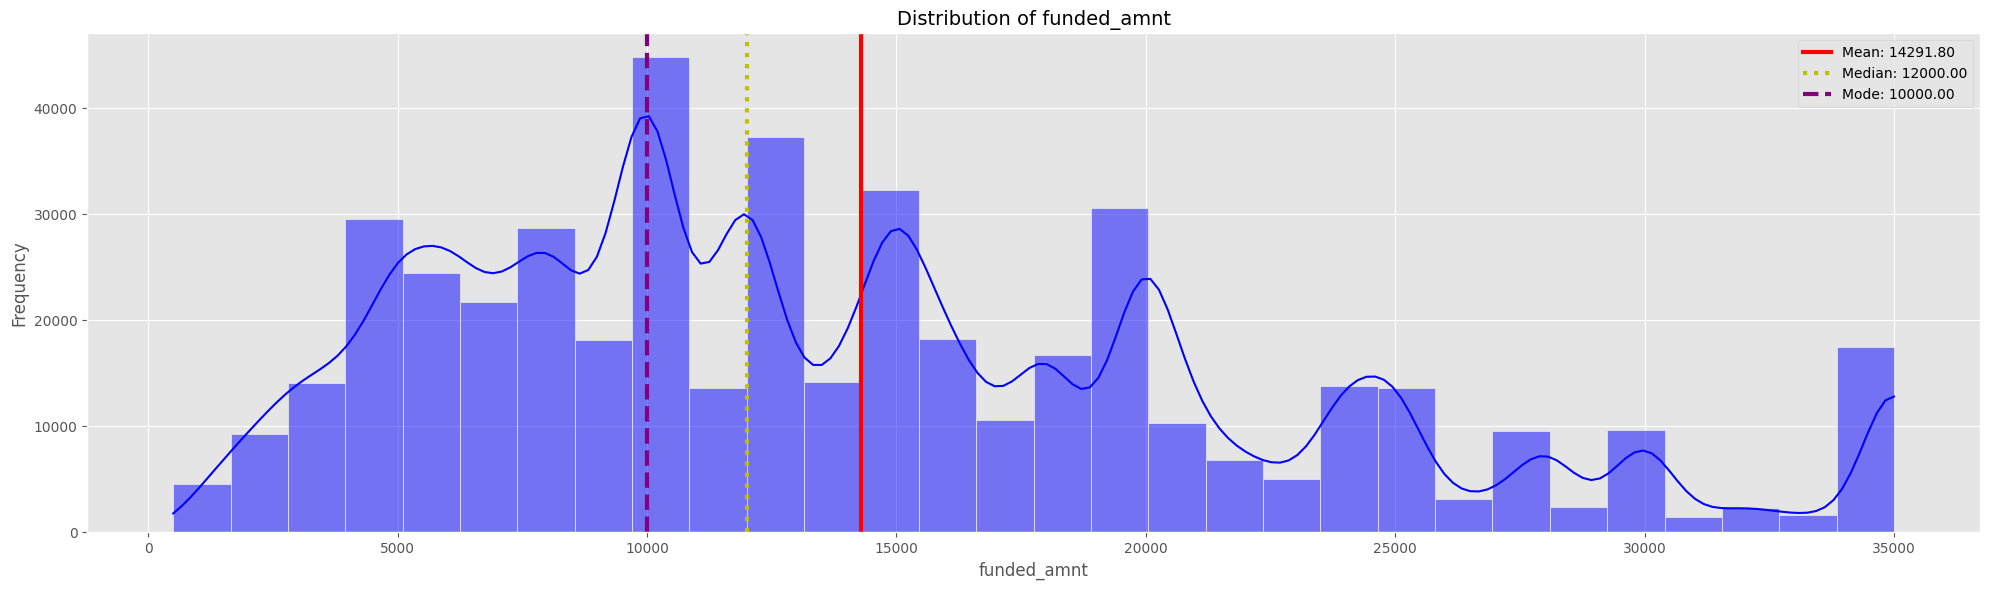

Ringkasan statistik dari funded_amnt:
Rata-rata: 14291.80
Standar deviasi: 8274.37
Median: 12000.00
Mode: 10000.00
----------------------------------------


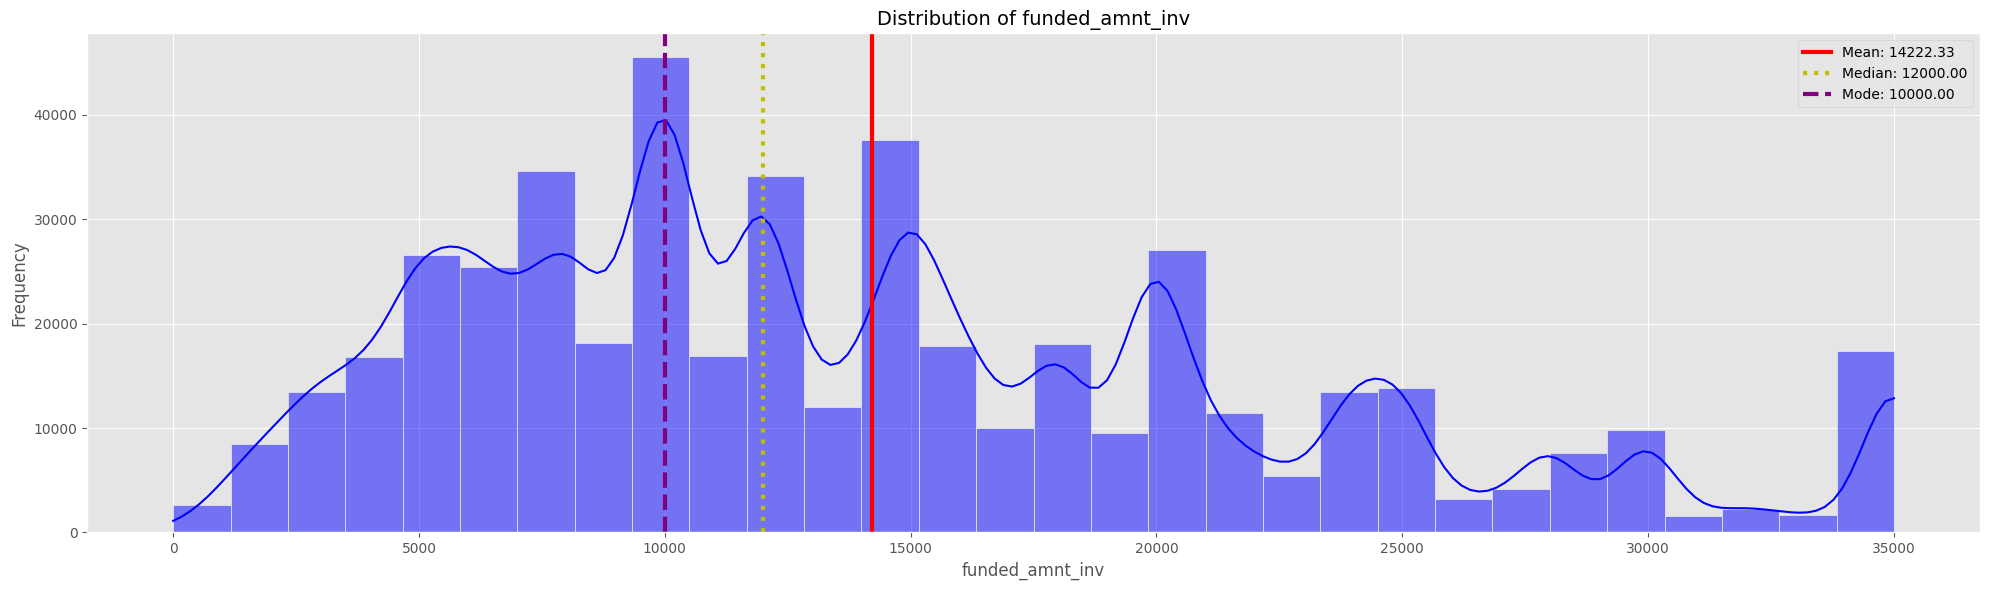

Ringkasan statistik dari funded_amnt_inv:
Rata-rata: 14222.33
Standar deviasi: 8297.64
Median: 12000.00
Mode: 10000.00
----------------------------------------


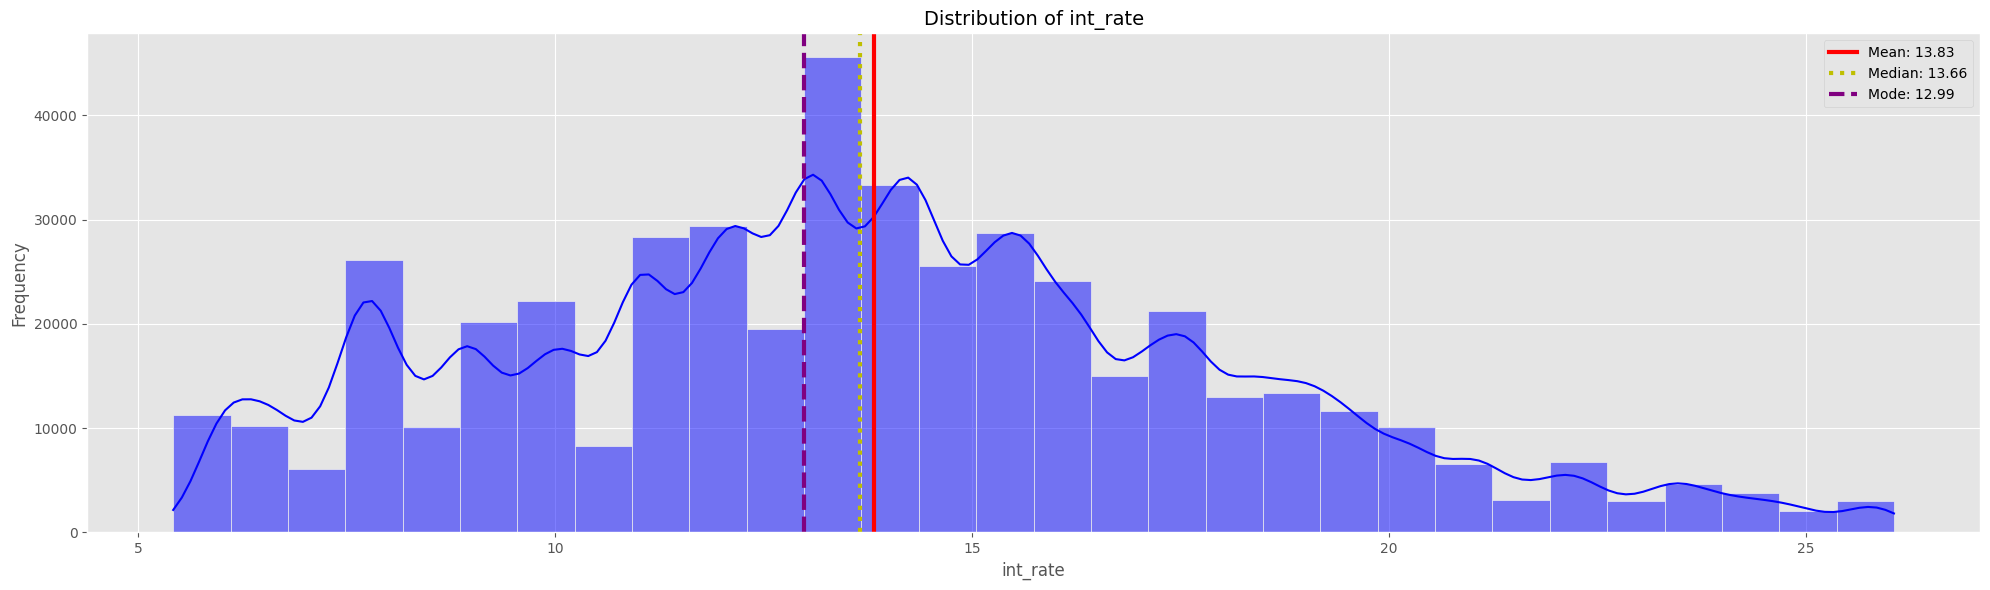

Ringkasan statistik dari int_rate:
Rata-rata: 13.83
Standar deviasi: 4.36
Median: 13.66
Mode: 12.99
----------------------------------------


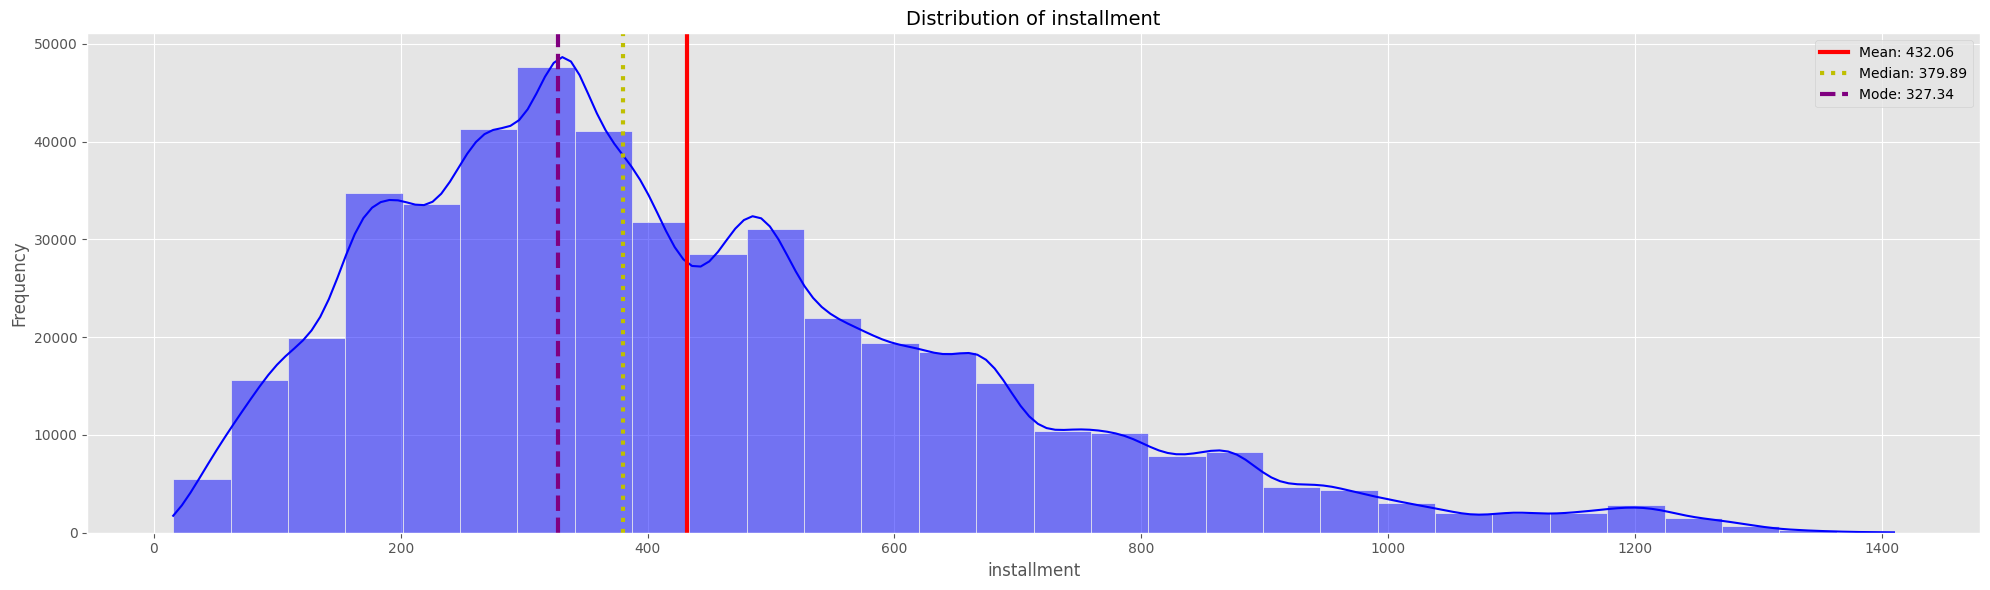

Ringkasan statistik dari installment:
Rata-rata: 432.06
Standar deviasi: 243.49
Median: 379.89
Mode: 327.34
----------------------------------------


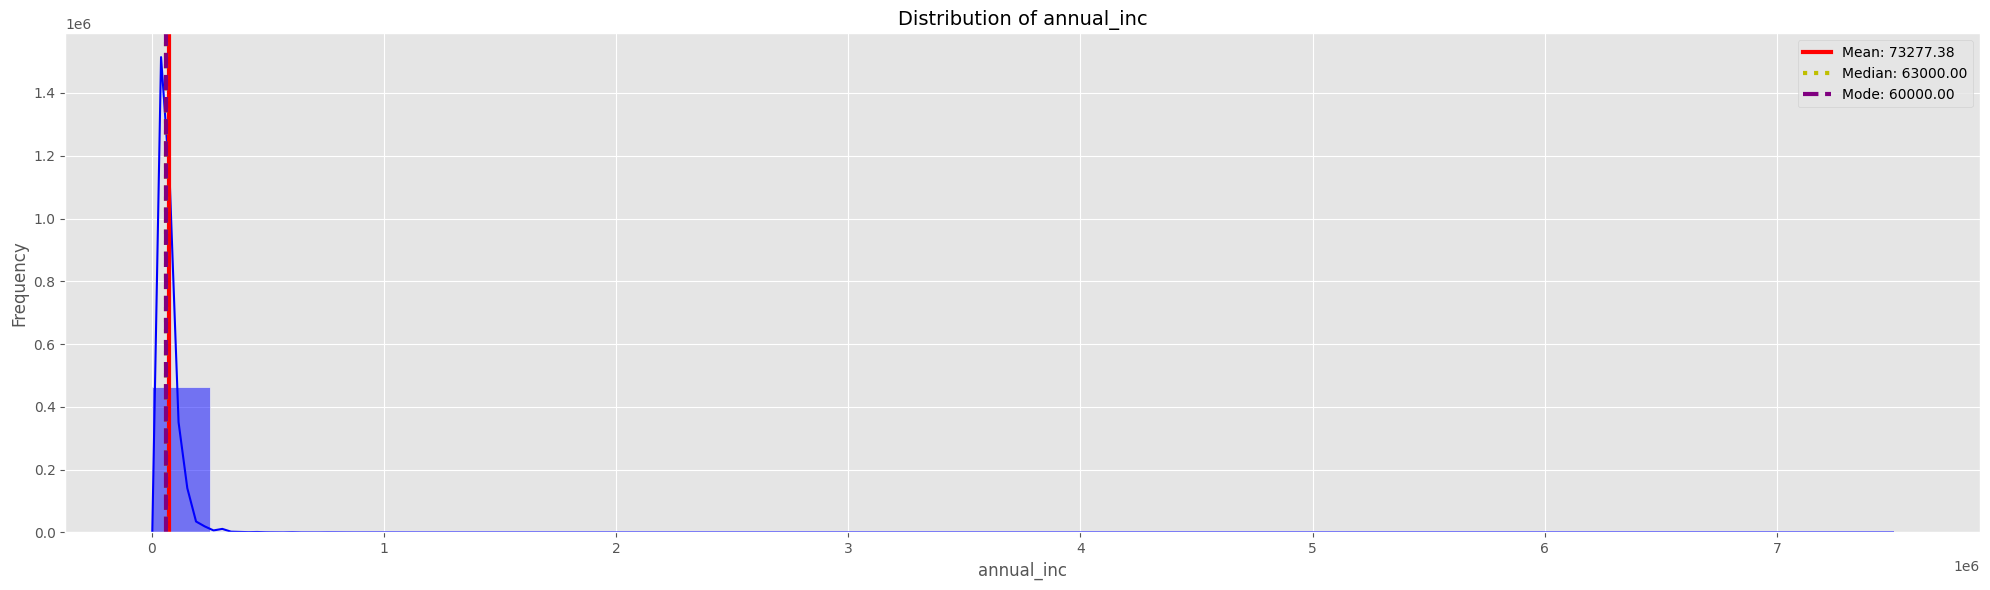

Ringkasan statistik dari annual_inc:
Rata-rata: 73277.38
Standar deviasi: 54963.57
Median: 63000.00
Mode: 60000.00
----------------------------------------


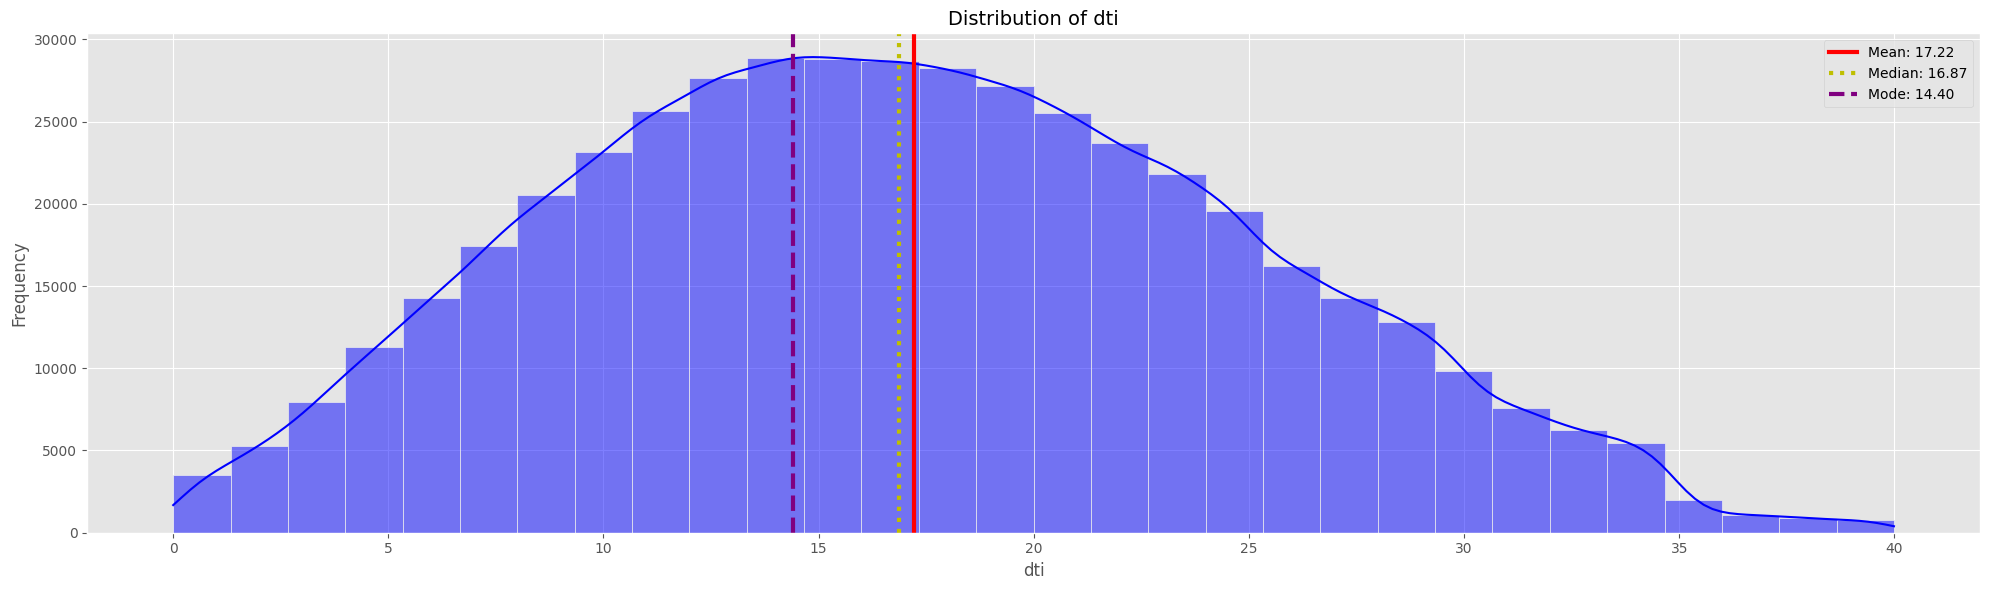

Ringkasan statistik dari dti:
Rata-rata: 17.22
Standar deviasi: 7.85
Median: 16.87
Mode: 14.40
----------------------------------------


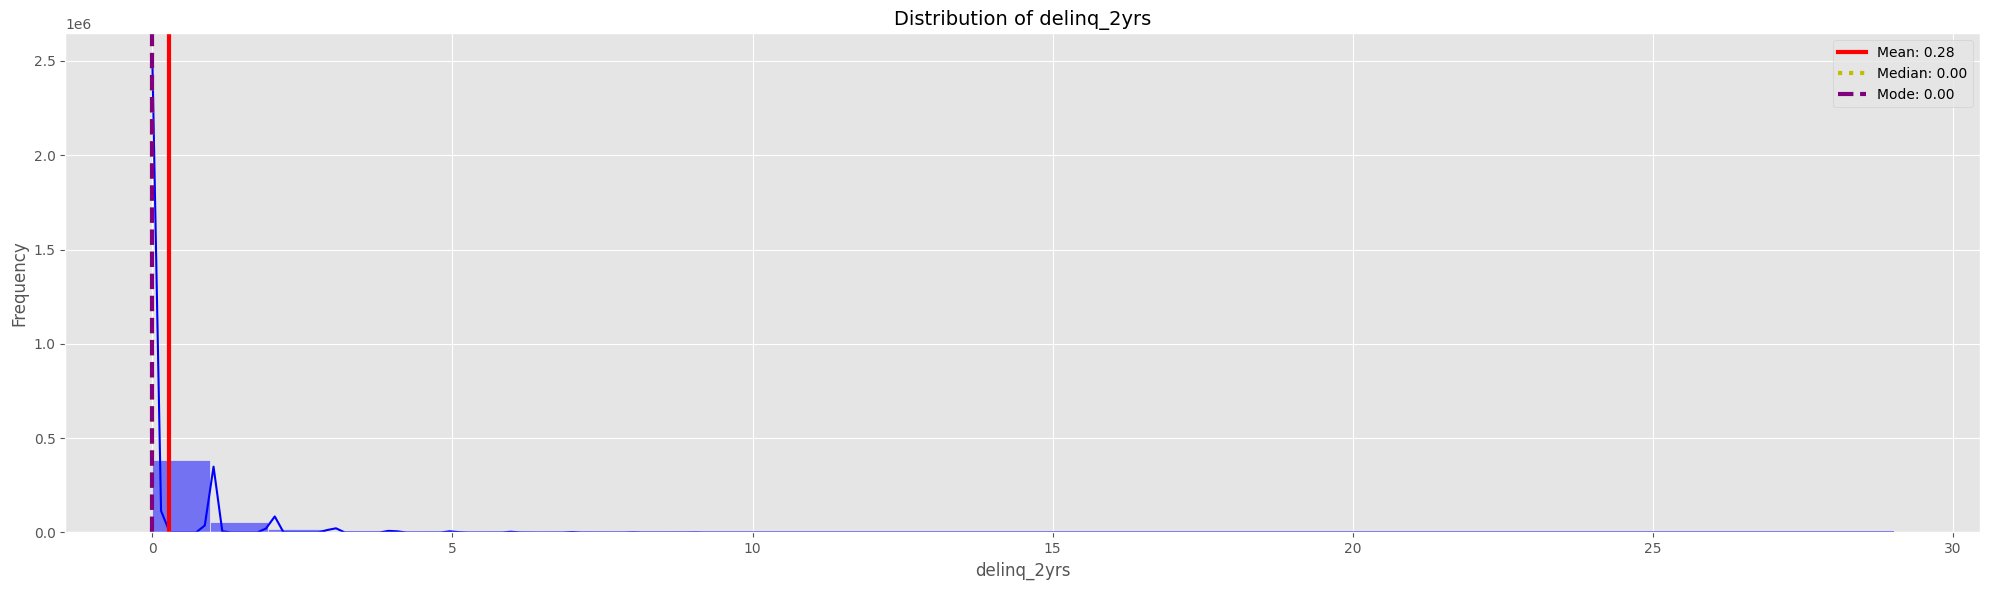

Ringkasan statistik dari delinq_2yrs:
Rata-rata: 0.28
Standar deviasi: 0.80
Median: 0.00
Mode: 0.00
----------------------------------------


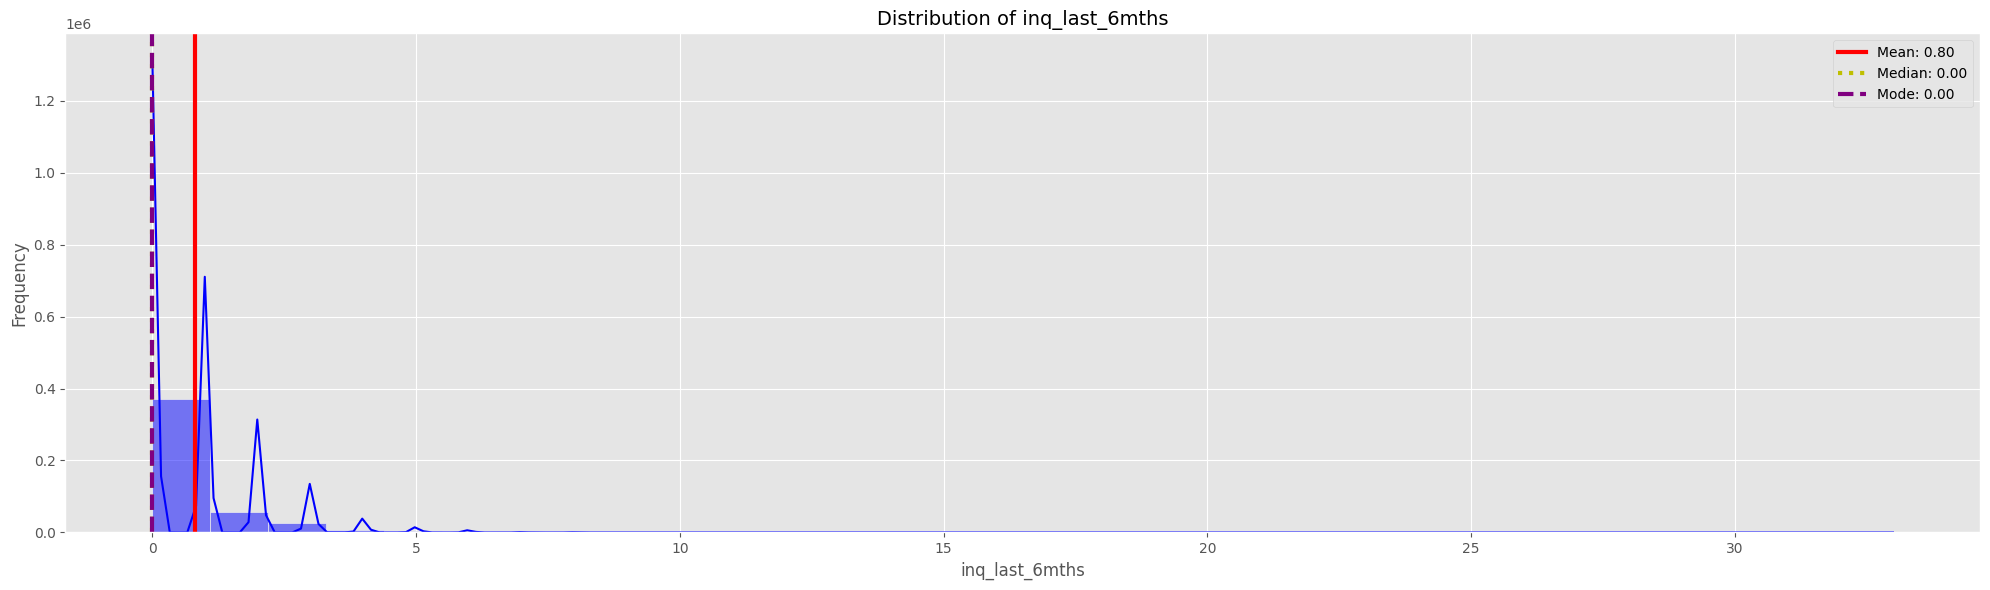

Ringkasan statistik dari inq_last_6mths:
Rata-rata: 0.80
Standar deviasi: 1.09
Median: 0.00
Mode: 0.00
----------------------------------------


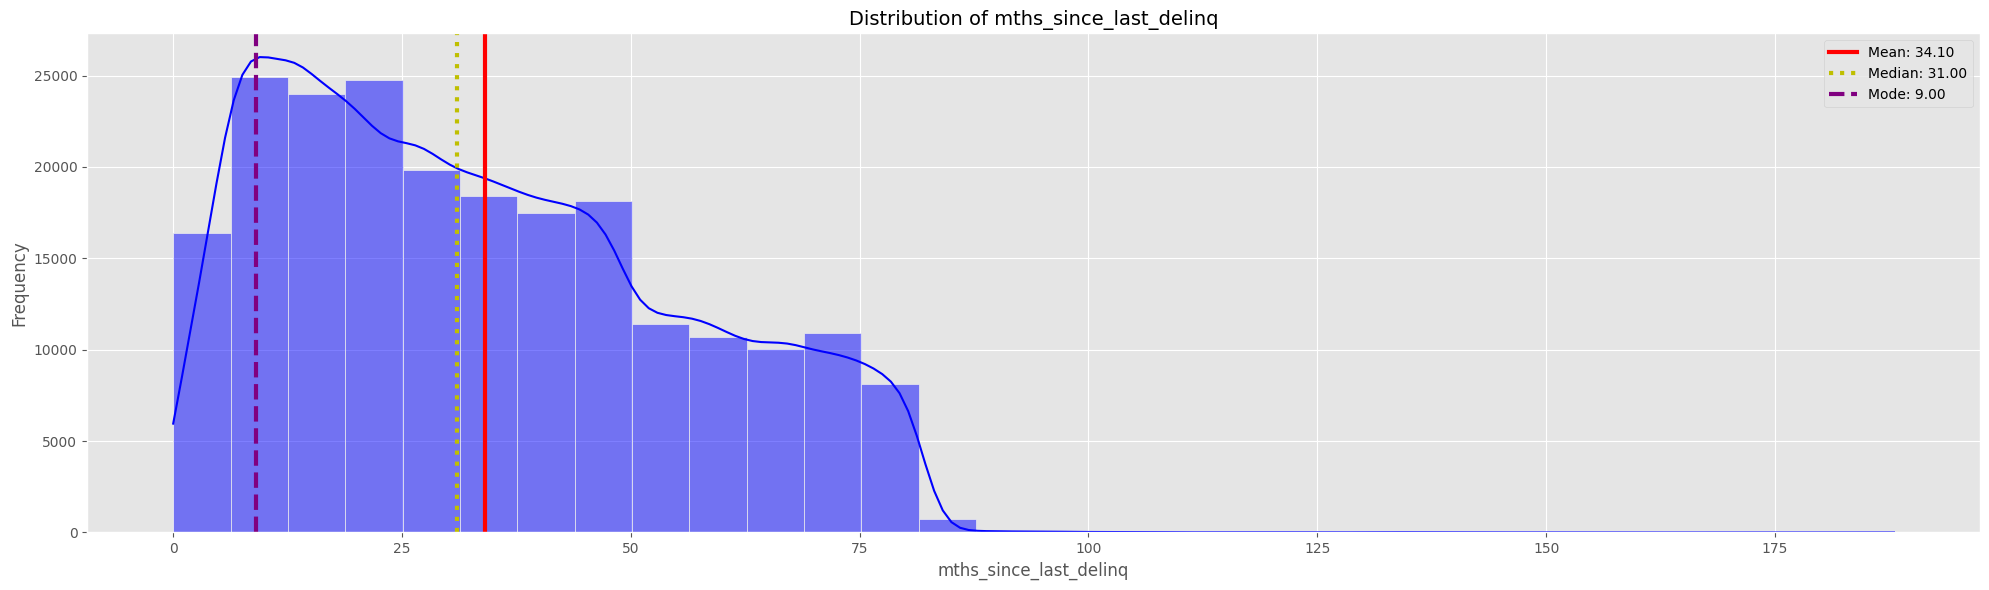

Ringkasan statistik dari mths_since_last_delinq:
Rata-rata: 34.10
Standar deviasi: 21.78
Median: 31.00
Mode: 9.00
----------------------------------------


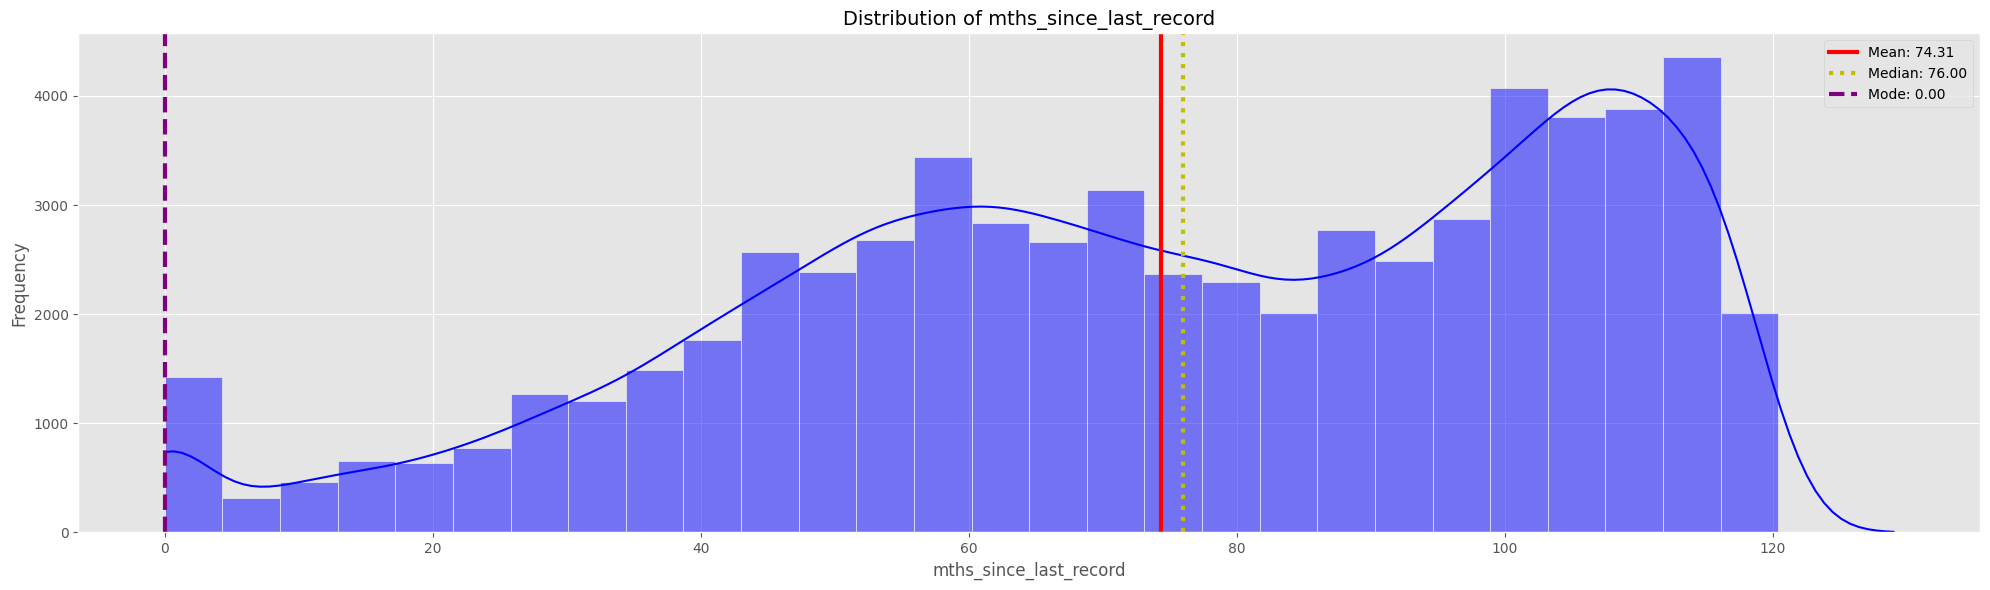

Ringkasan statistik dari mths_since_last_record:
Rata-rata: 74.31
Standar deviasi: 30.36
Median: 76.00
Mode: 0.00
----------------------------------------


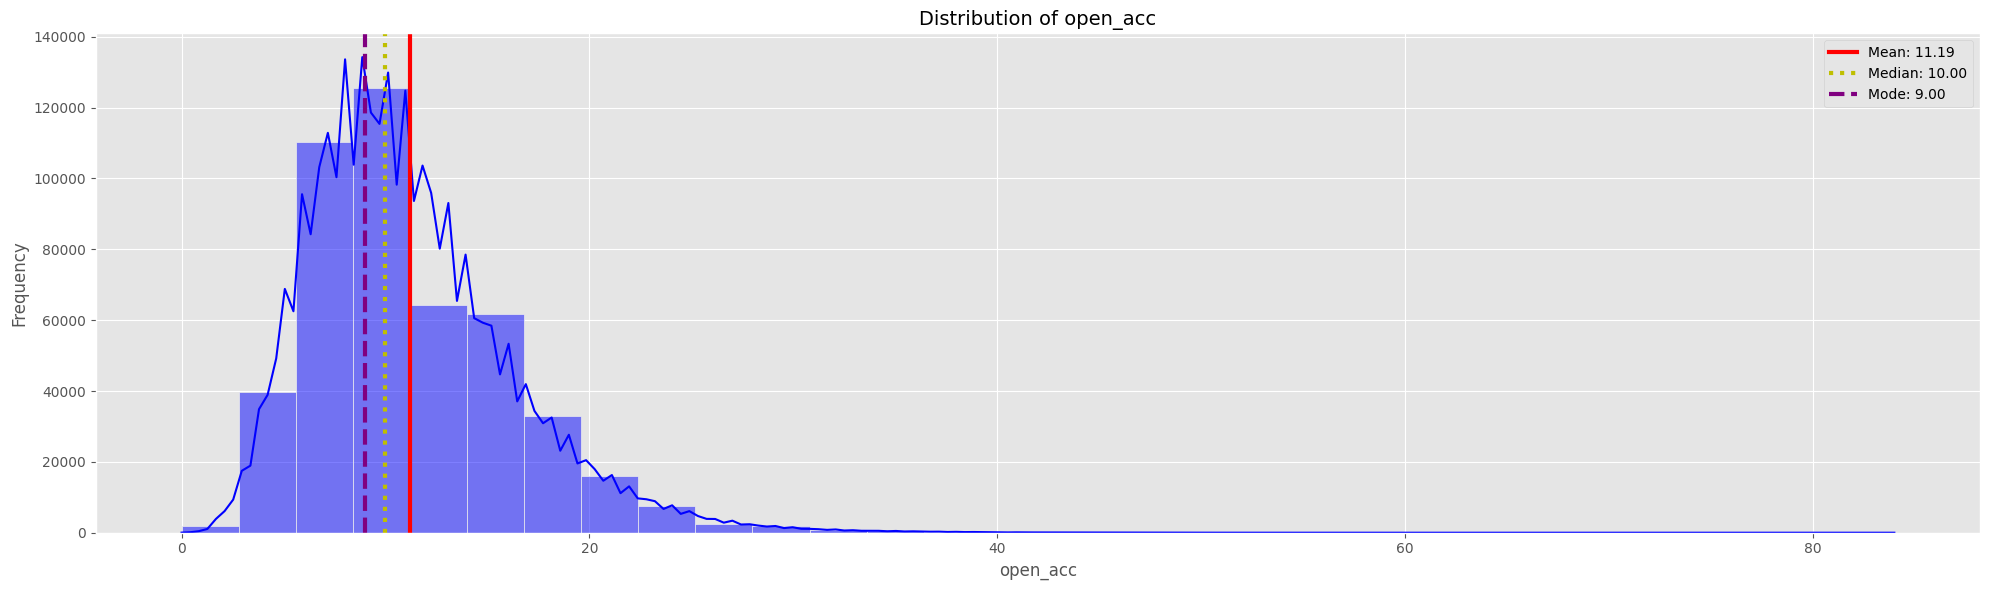

Ringkasan statistik dari open_acc:
Rata-rata: 11.19
Standar deviasi: 4.99
Median: 10.00
Mode: 9.00
----------------------------------------


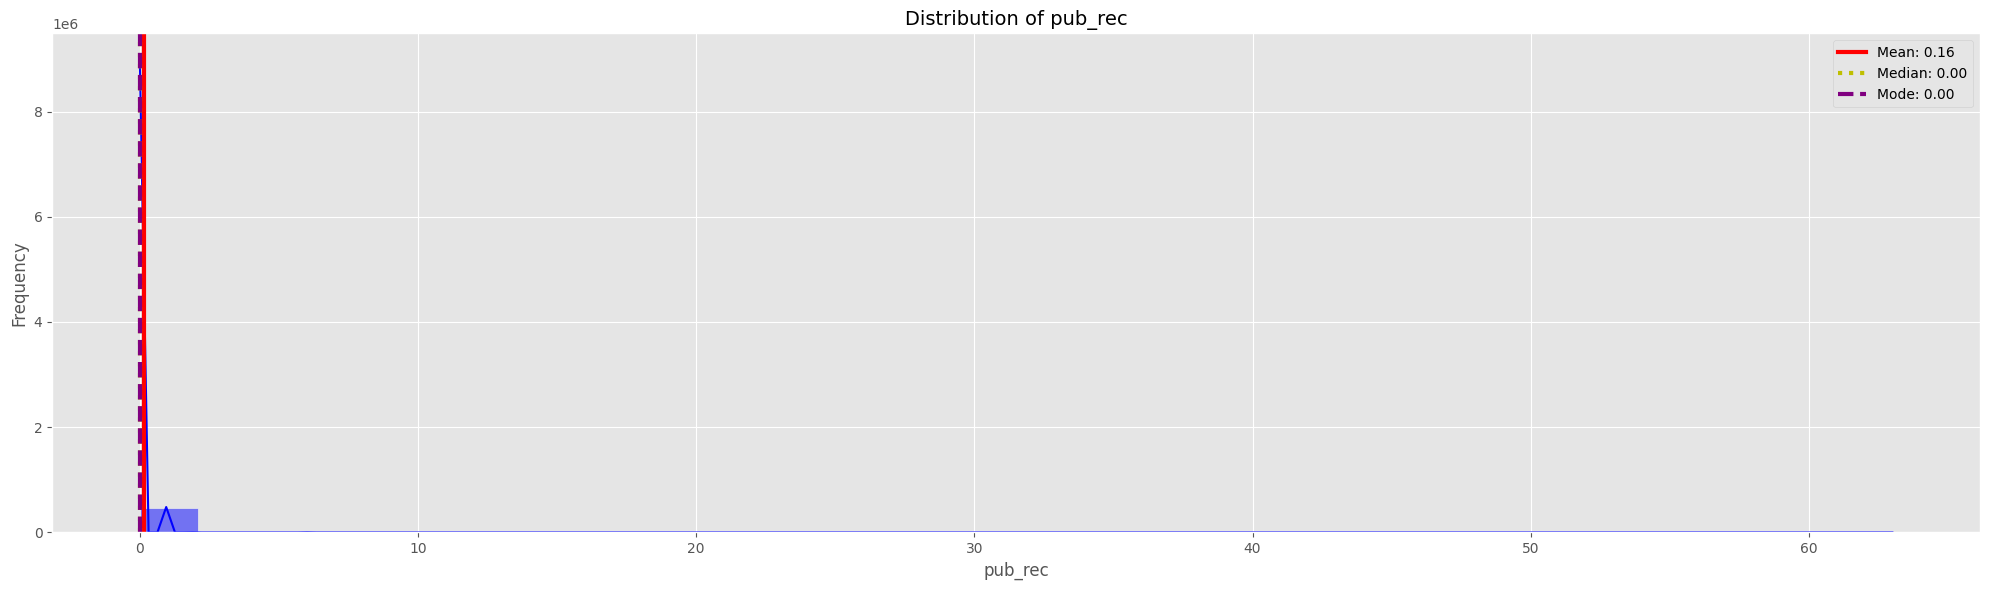

Ringkasan statistik dari pub_rec:
Rata-rata: 0.16
Standar deviasi: 0.51
Median: 0.00
Mode: 0.00
----------------------------------------


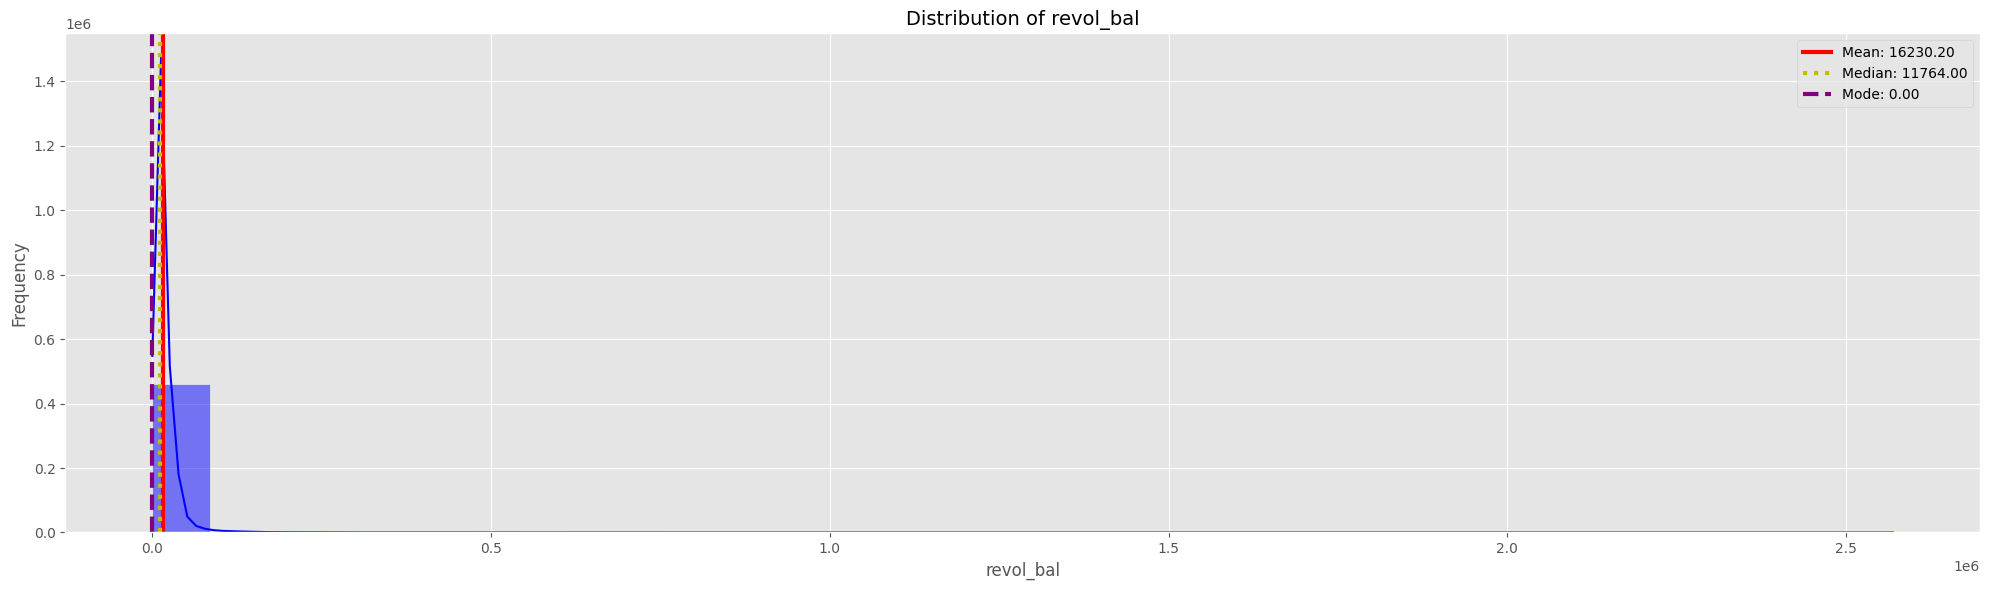

Ringkasan statistik dari revol_bal:
Rata-rata: 16230.20
Standar deviasi: 20676.25
Median: 11764.00
Mode: 0.00
----------------------------------------


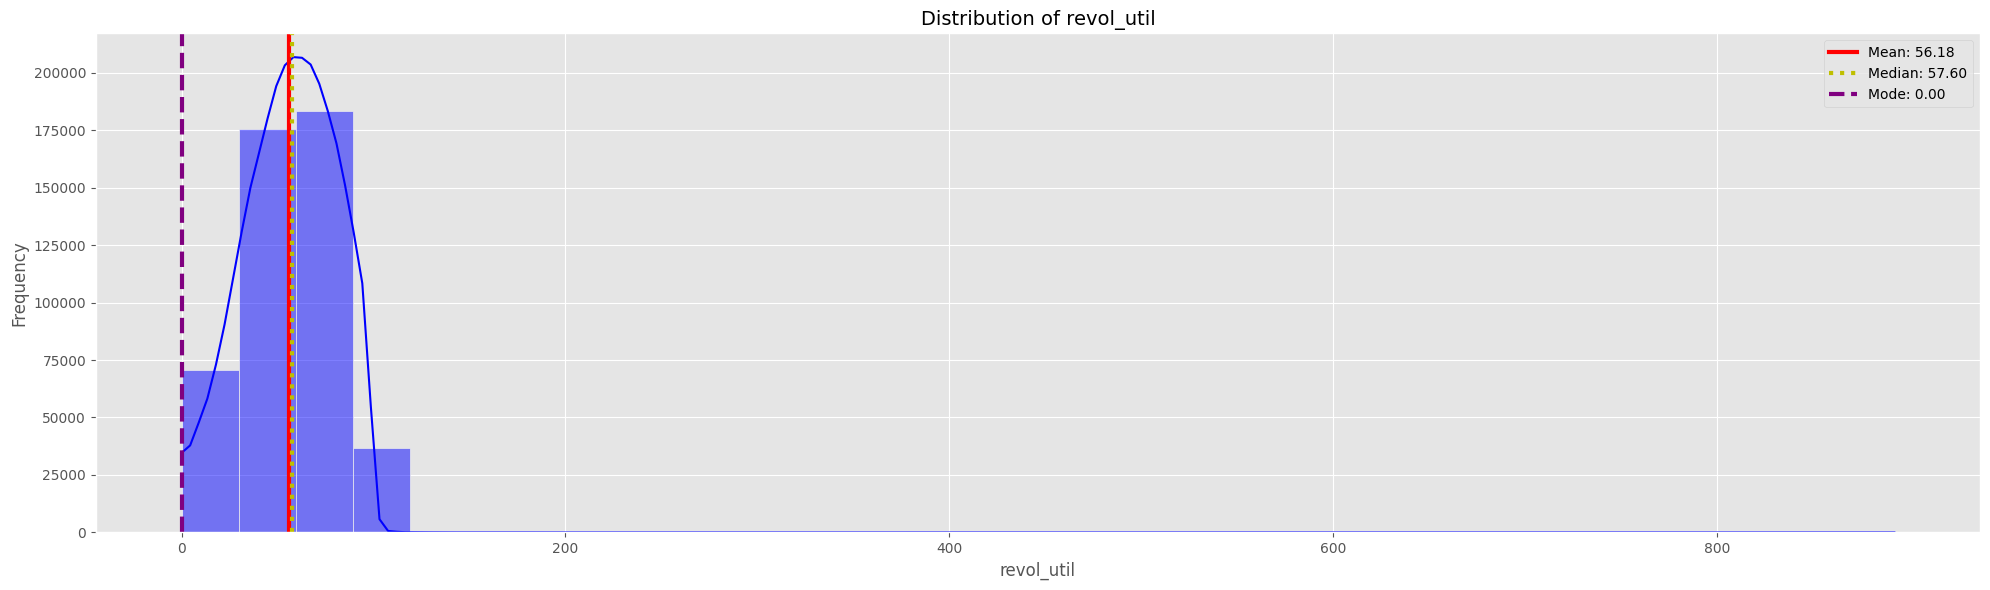

Ringkasan statistik dari revol_util:
Rata-rata: 56.18
Standar deviasi: 23.73
Median: 57.60
Mode: 0.00
----------------------------------------


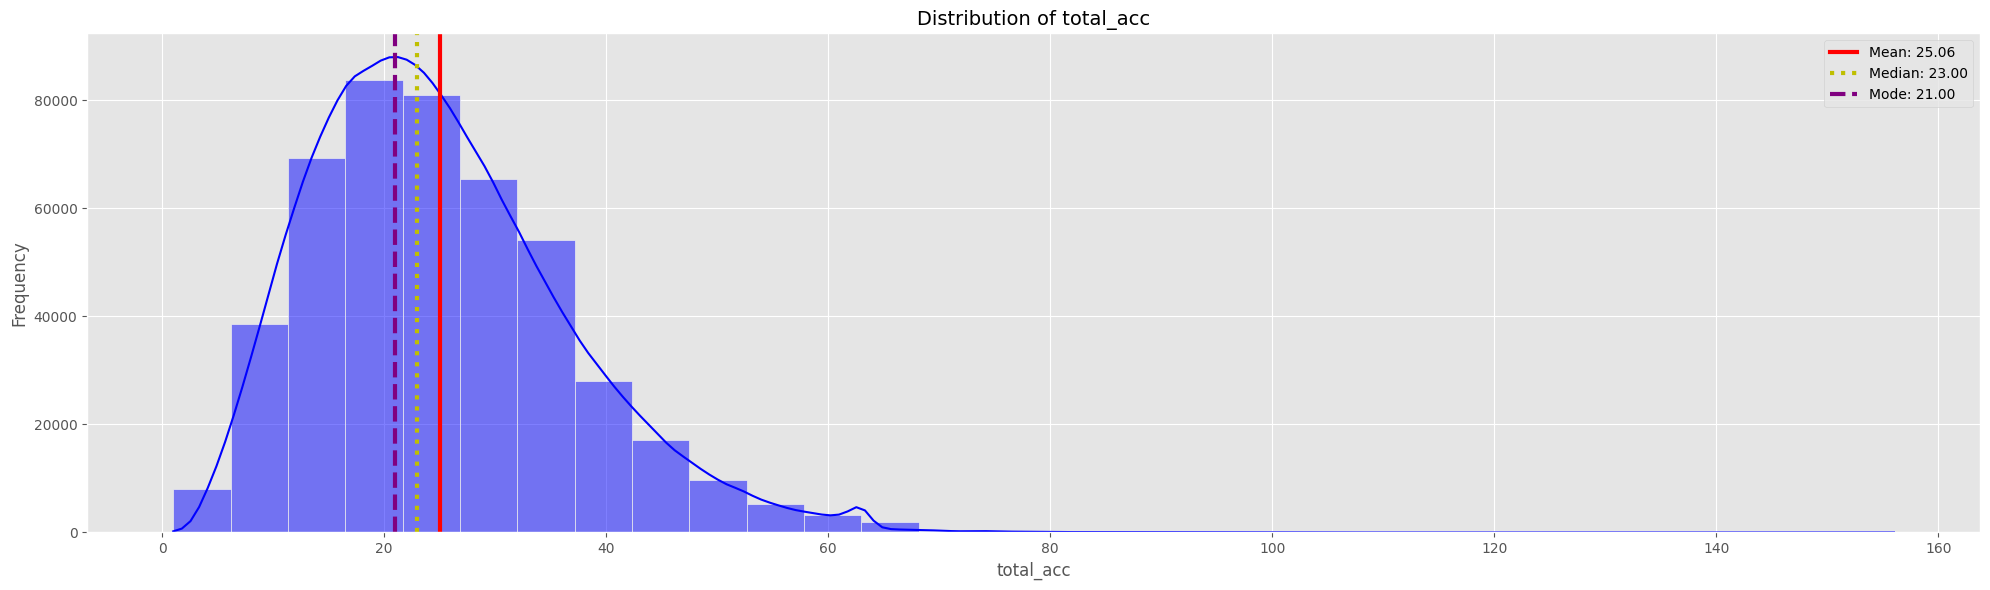

Ringkasan statistik dari total_acc:
Rata-rata: 25.06
Standar deviasi: 11.60
Median: 23.00
Mode: 21.00
----------------------------------------


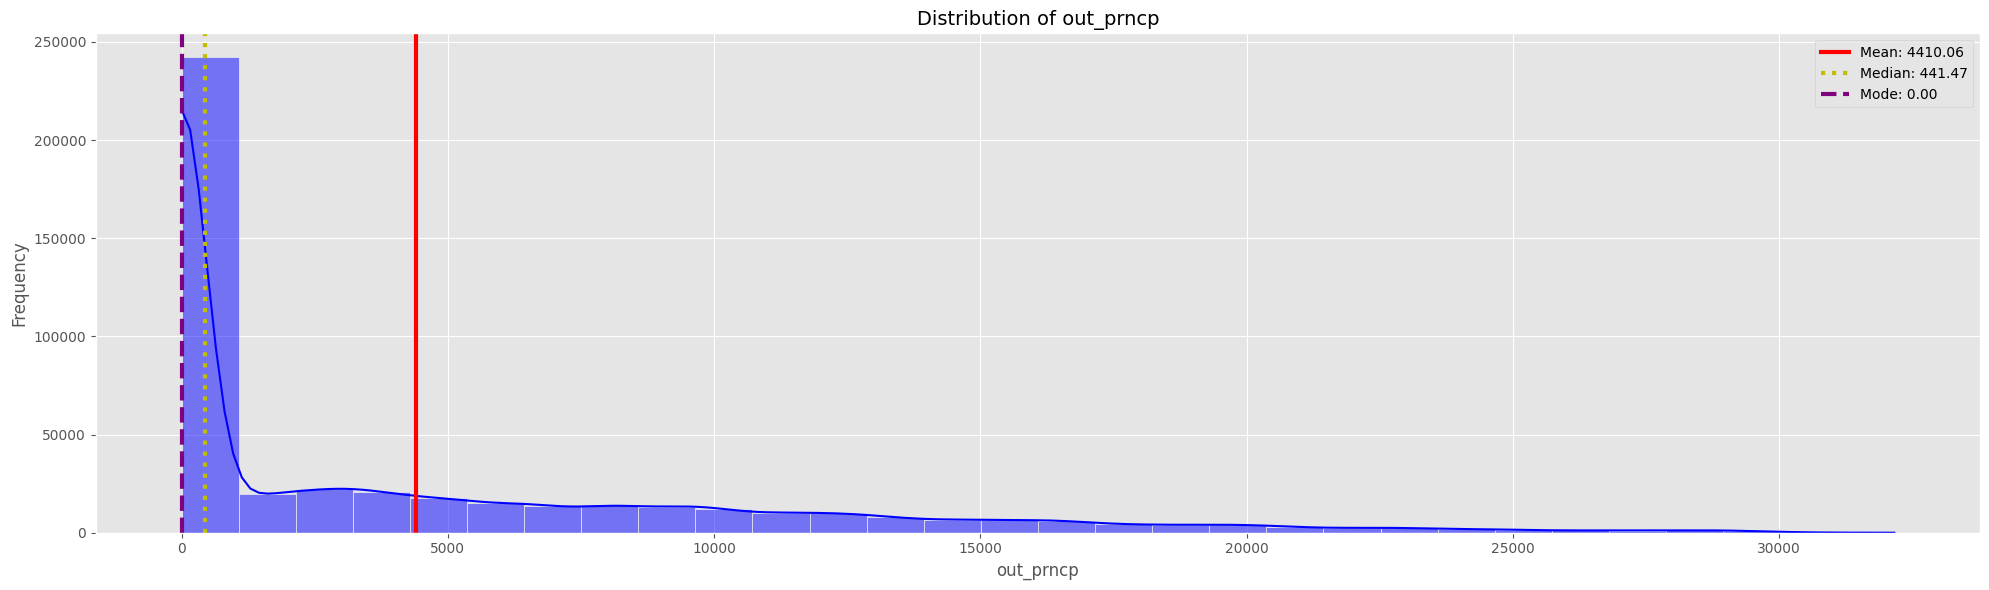

Ringkasan statistik dari out_prncp:
Rata-rata: 4410.06
Standar deviasi: 6355.08
Median: 441.47
Mode: 0.00
----------------------------------------


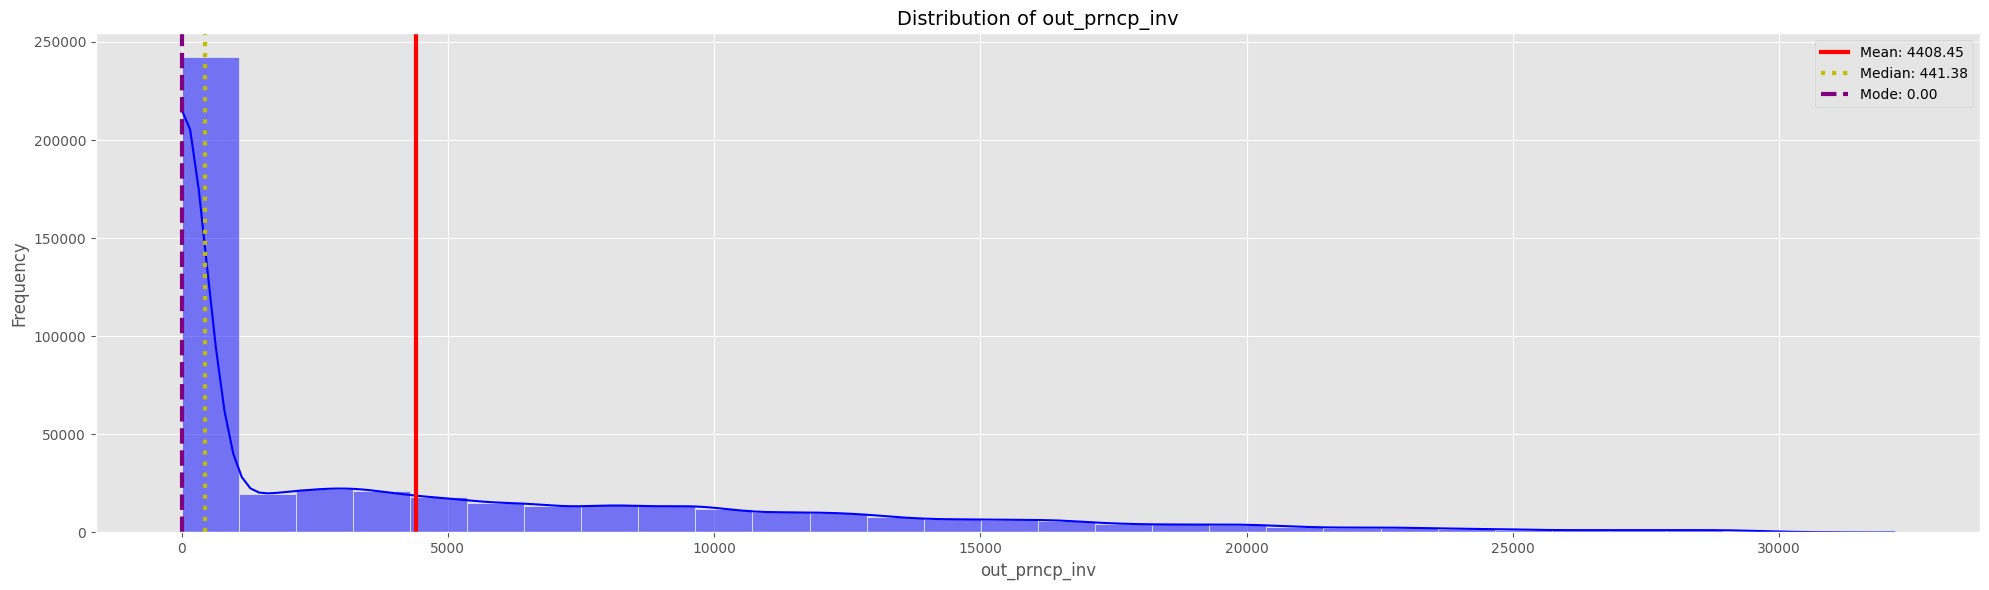

Ringkasan statistik dari out_prncp_inv:
Rata-rata: 4408.45
Standar deviasi: 6353.20
Median: 441.38
Mode: 0.00
----------------------------------------


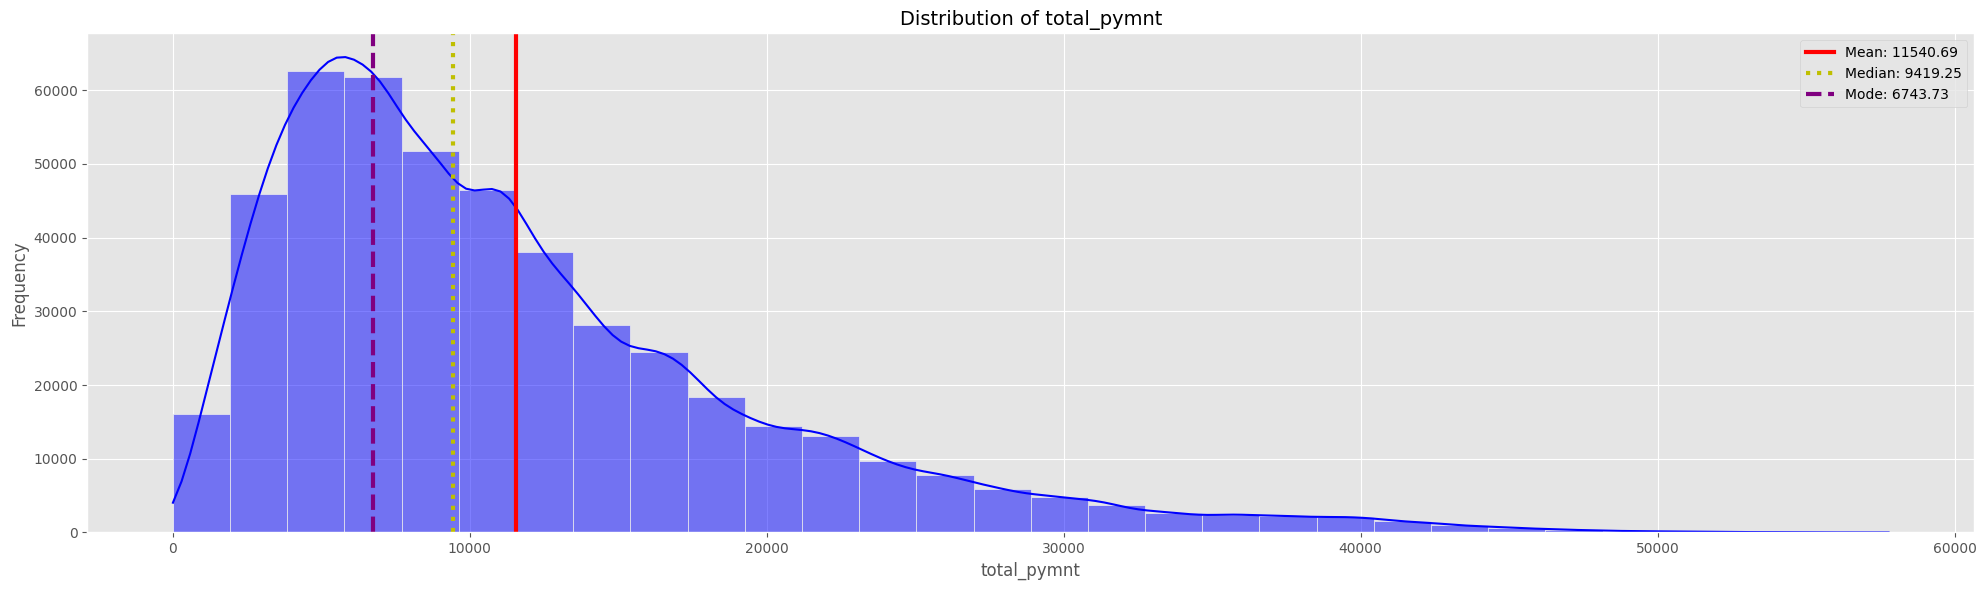

Ringkasan statistik dari total_pymnt:
Rata-rata: 11540.69
Standar deviasi: 8265.63
Median: 9419.25
Mode: 6743.73
----------------------------------------


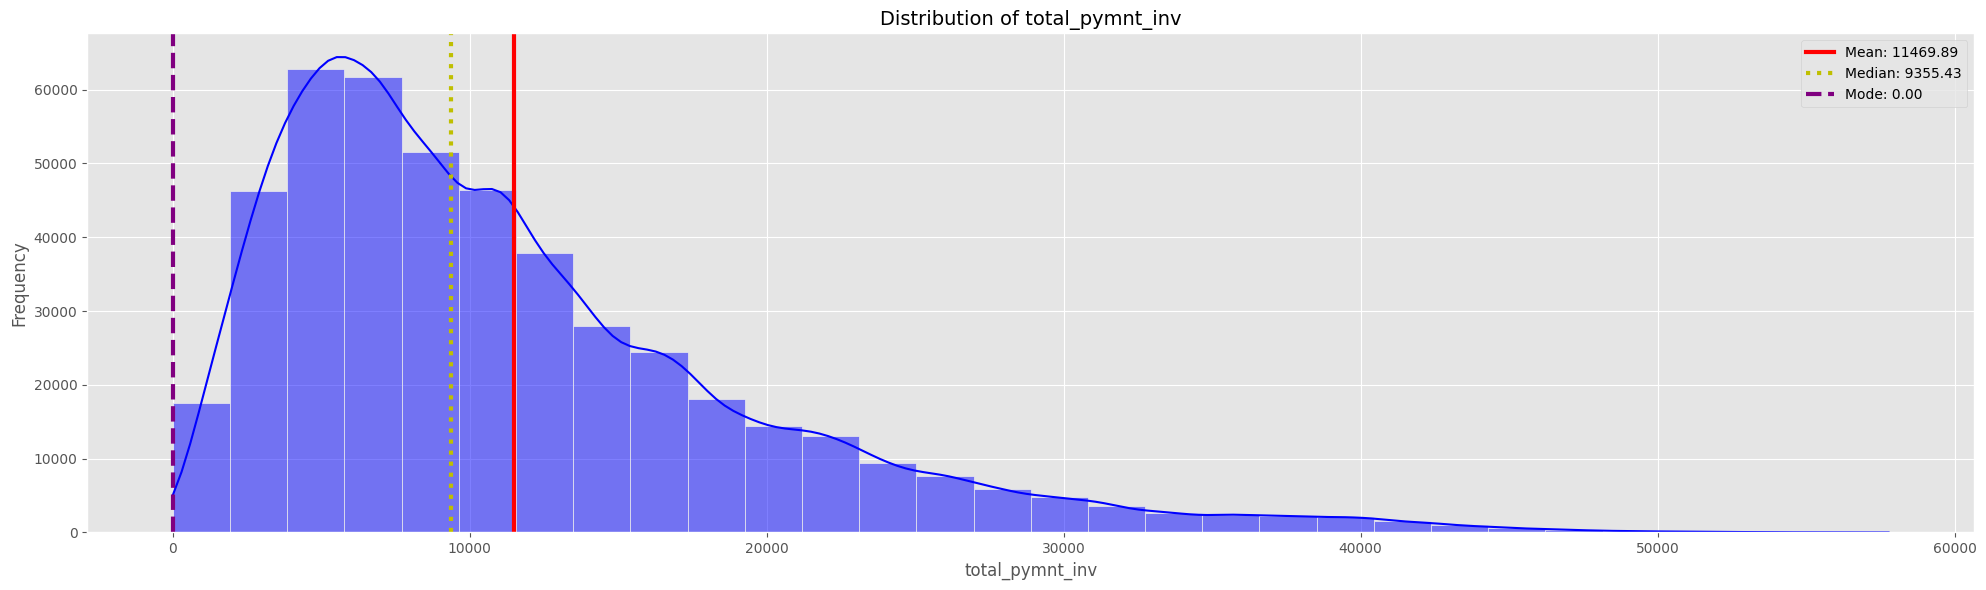

Ringkasan statistik dari total_pymnt_inv:
Rata-rata: 11469.89
Standar deviasi: 8254.16
Median: 9355.43
Mode: 0.00
----------------------------------------


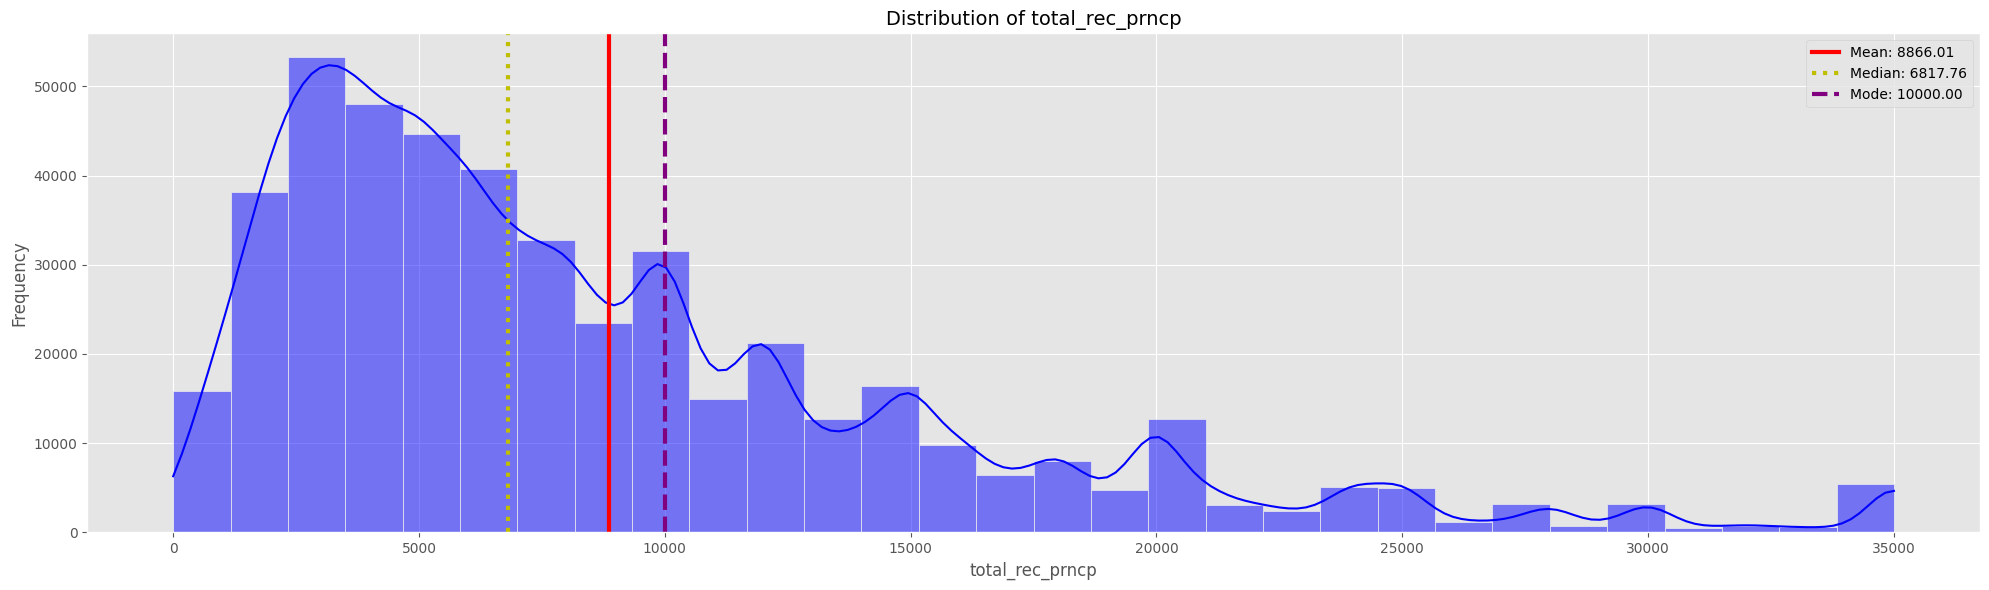

Ringkasan statistik dari total_rec_prncp:
Rata-rata: 8866.01
Standar deviasi: 7031.69
Median: 6817.76
Mode: 10000.00
----------------------------------------


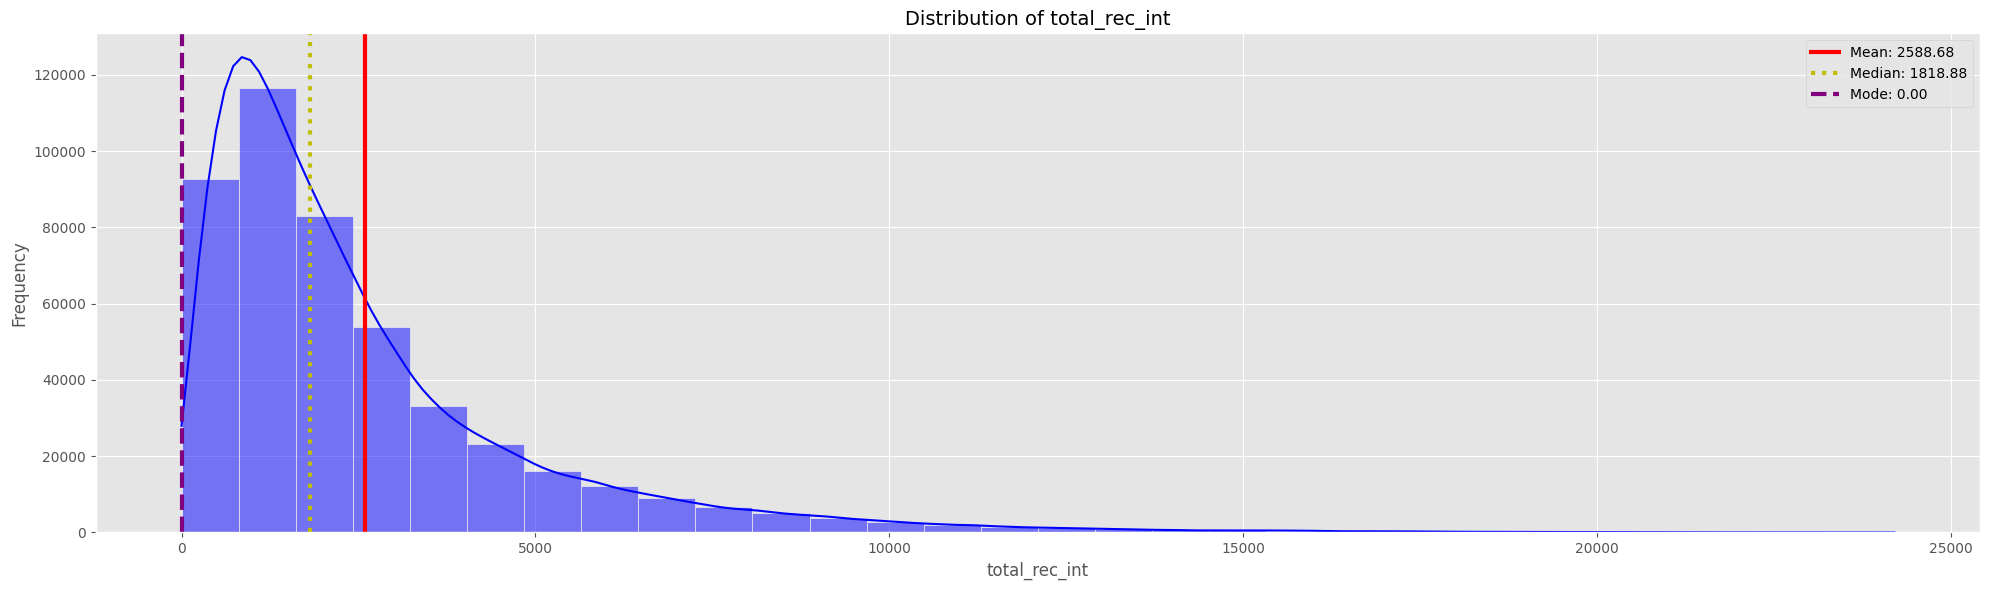

Ringkasan statistik dari total_rec_int:
Rata-rata: 2588.68
Standar deviasi: 2483.81
Median: 1818.88
Mode: 0.00
----------------------------------------


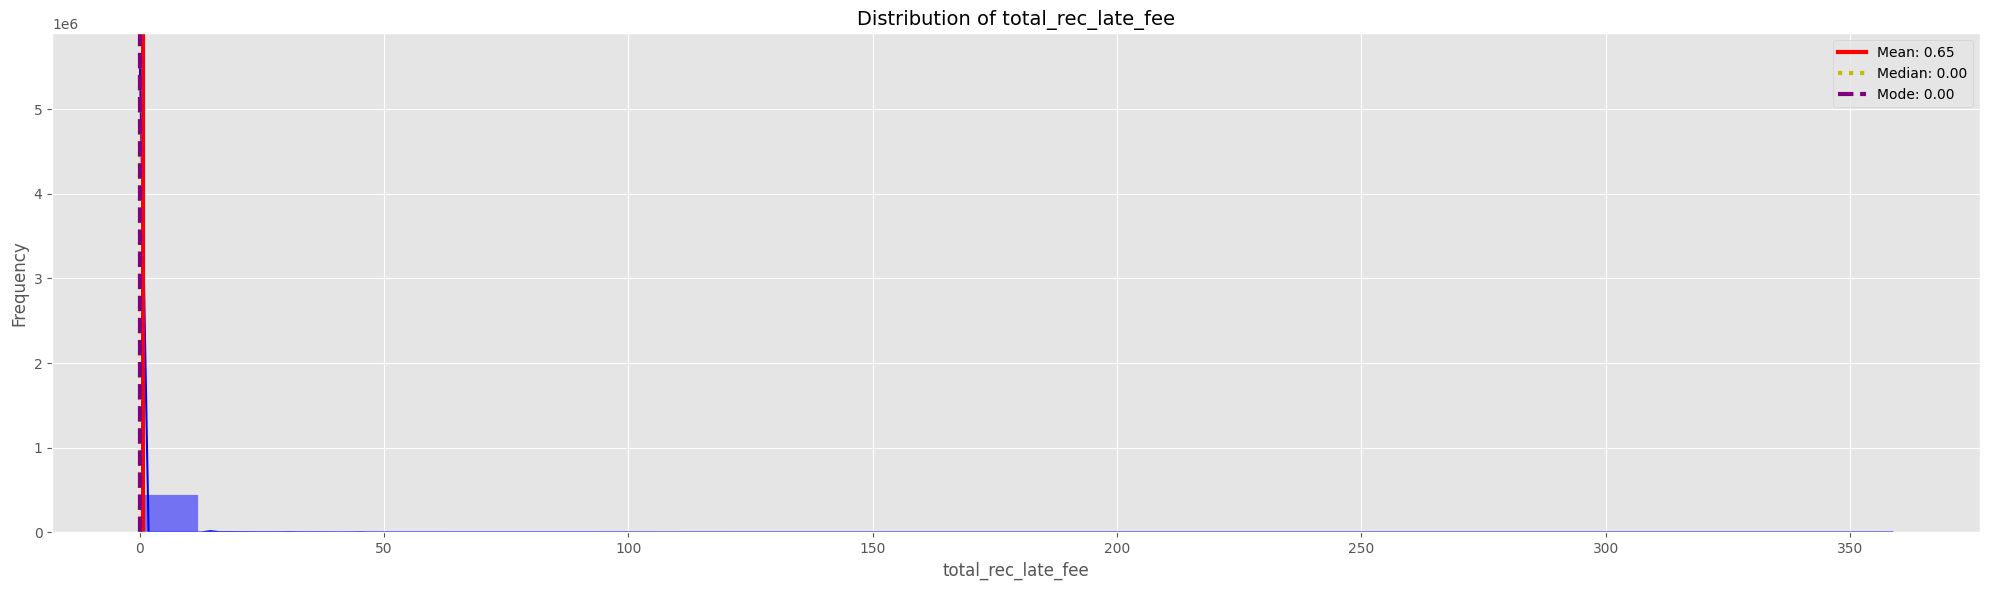

Ringkasan statistik dari total_rec_late_fee:
Rata-rata: 0.65
Standar deviasi: 5.27
Median: 0.00
Mode: 0.00
----------------------------------------


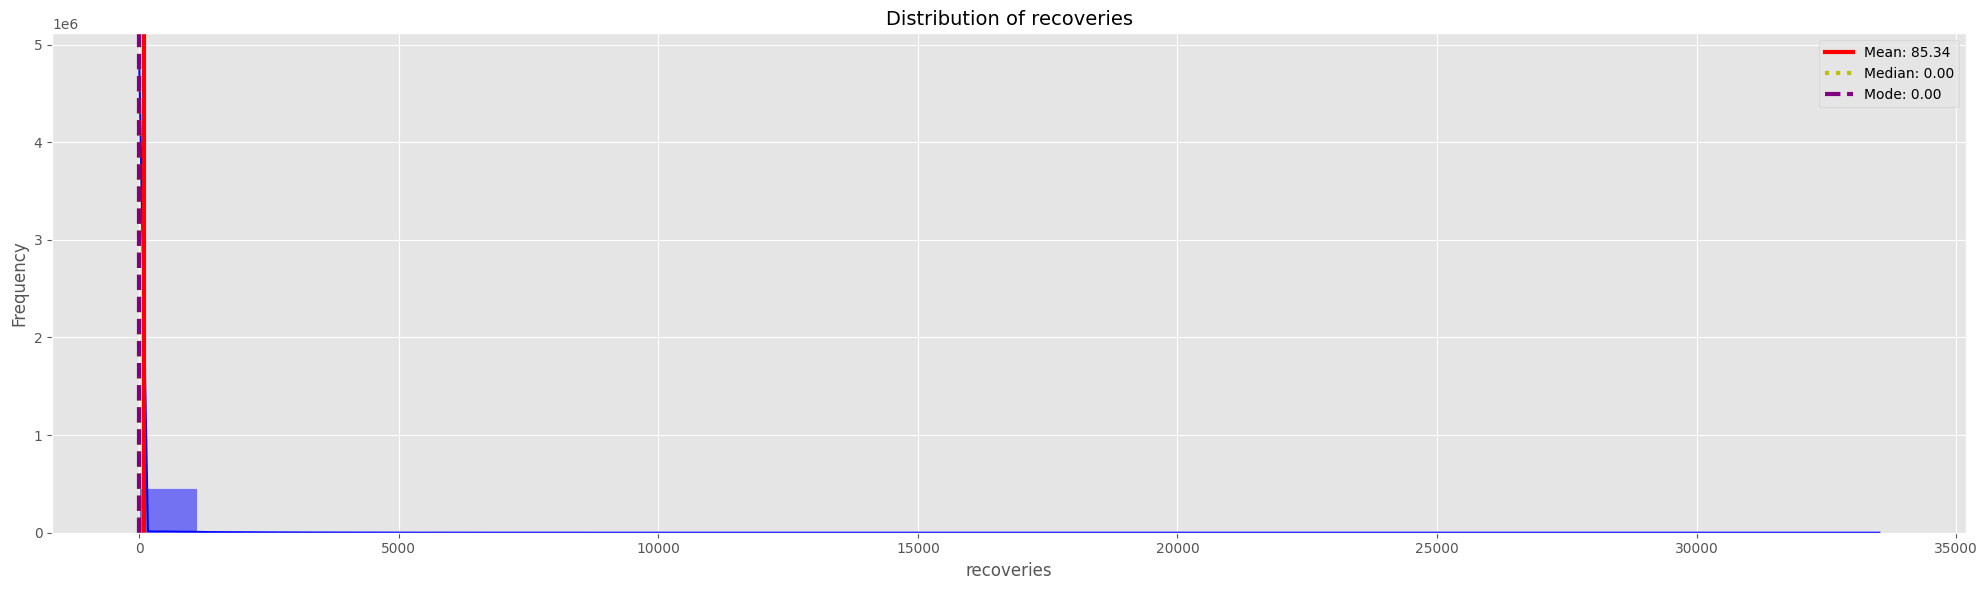

Ringkasan statistik dari recoveries:
Rata-rata: 85.34
Standar deviasi: 552.22
Median: 0.00
Mode: 0.00
----------------------------------------


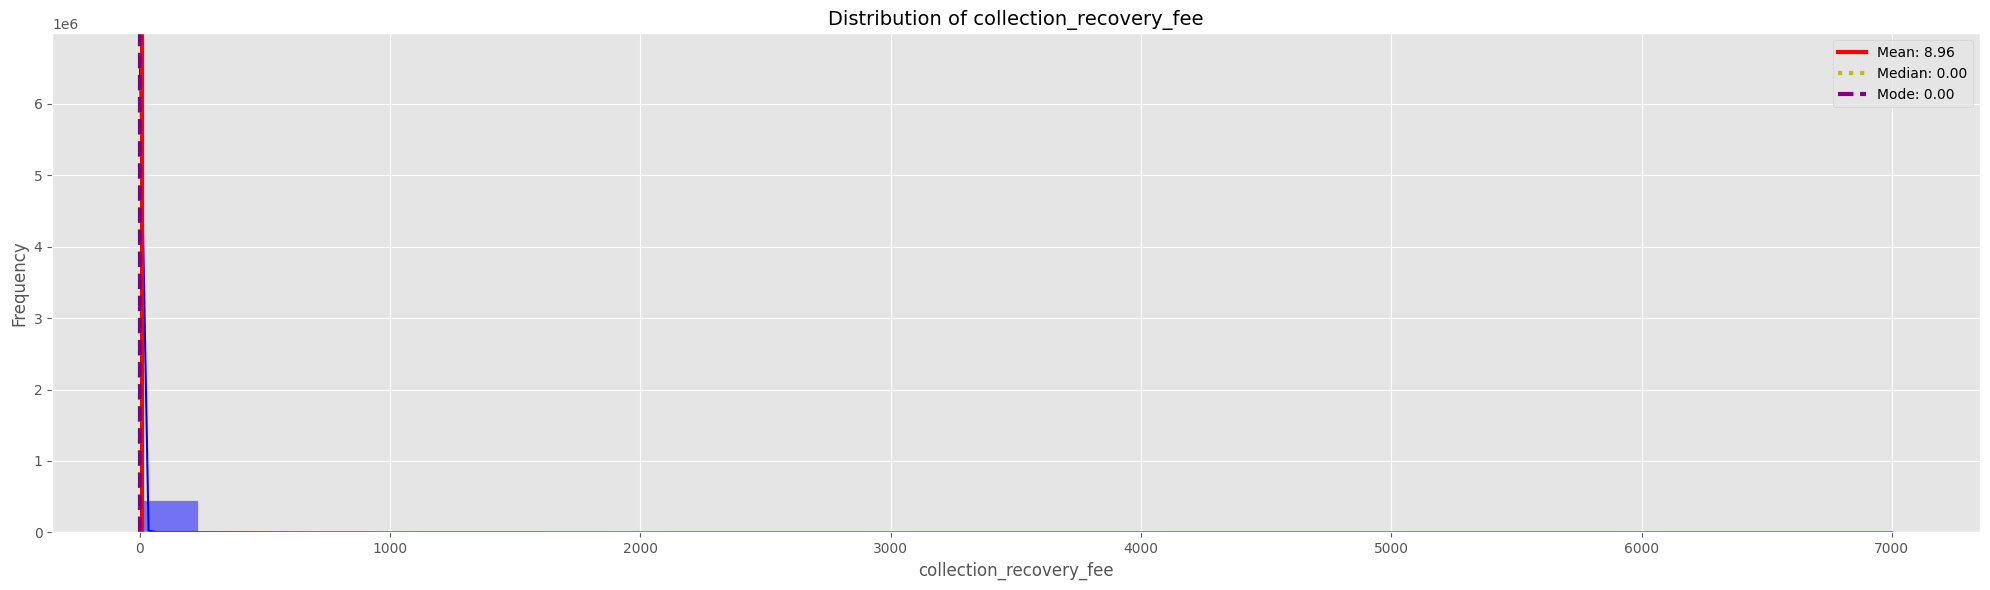

Ringkasan statistik dari collection_recovery_fee:
Rata-rata: 8.96
Standar deviasi: 85.49
Median: 0.00
Mode: 0.00
----------------------------------------


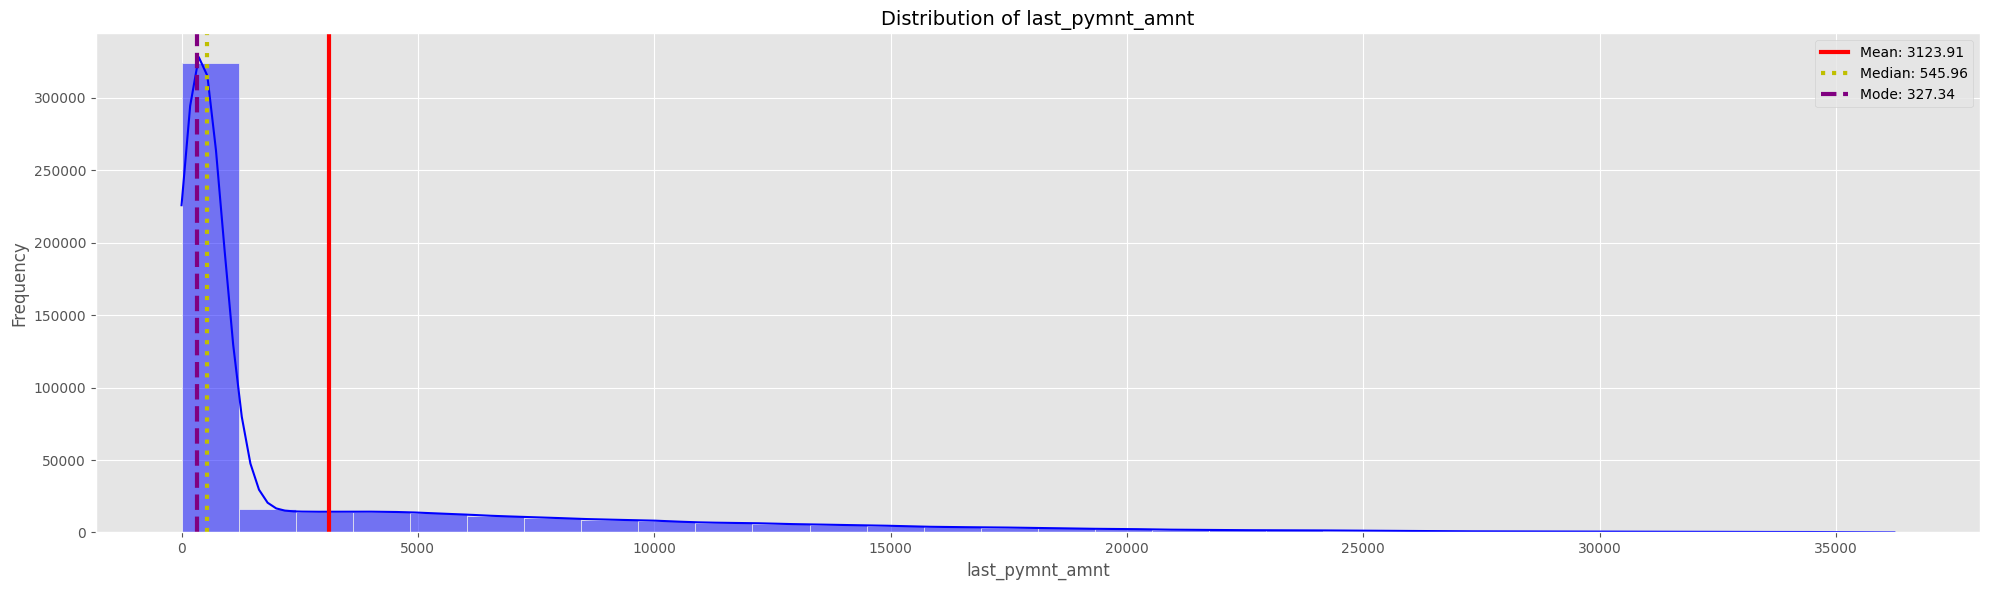

Ringkasan statistik dari last_pymnt_amnt:
Rata-rata: 3123.91
Standar deviasi: 5554.74
Median: 545.96
Mode: 327.34
----------------------------------------


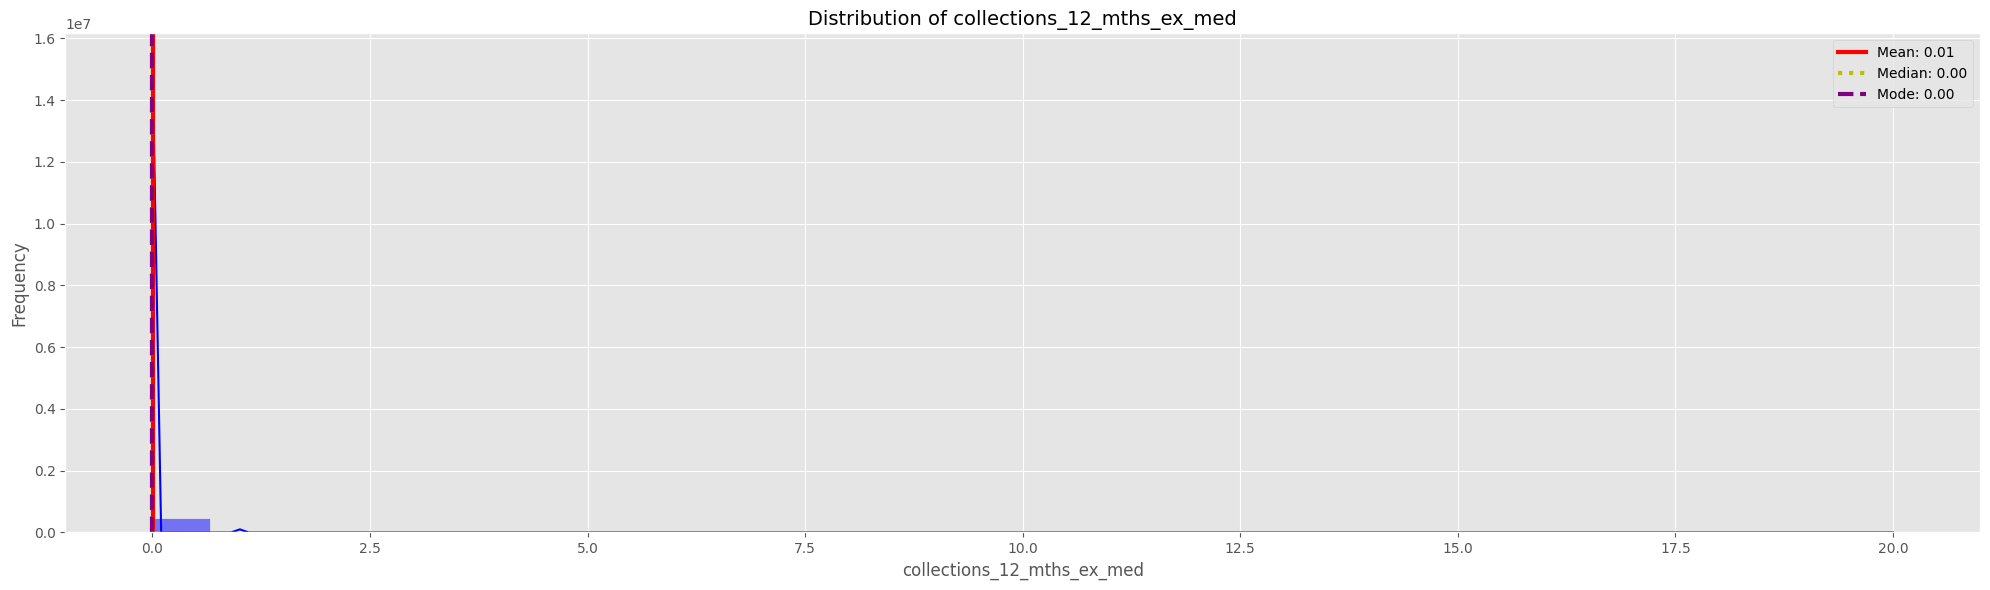

Ringkasan statistik dari collections_12_mths_ex_med:
Rata-rata: 0.01
Standar deviasi: 0.11
Median: 0.00
Mode: 0.00
----------------------------------------


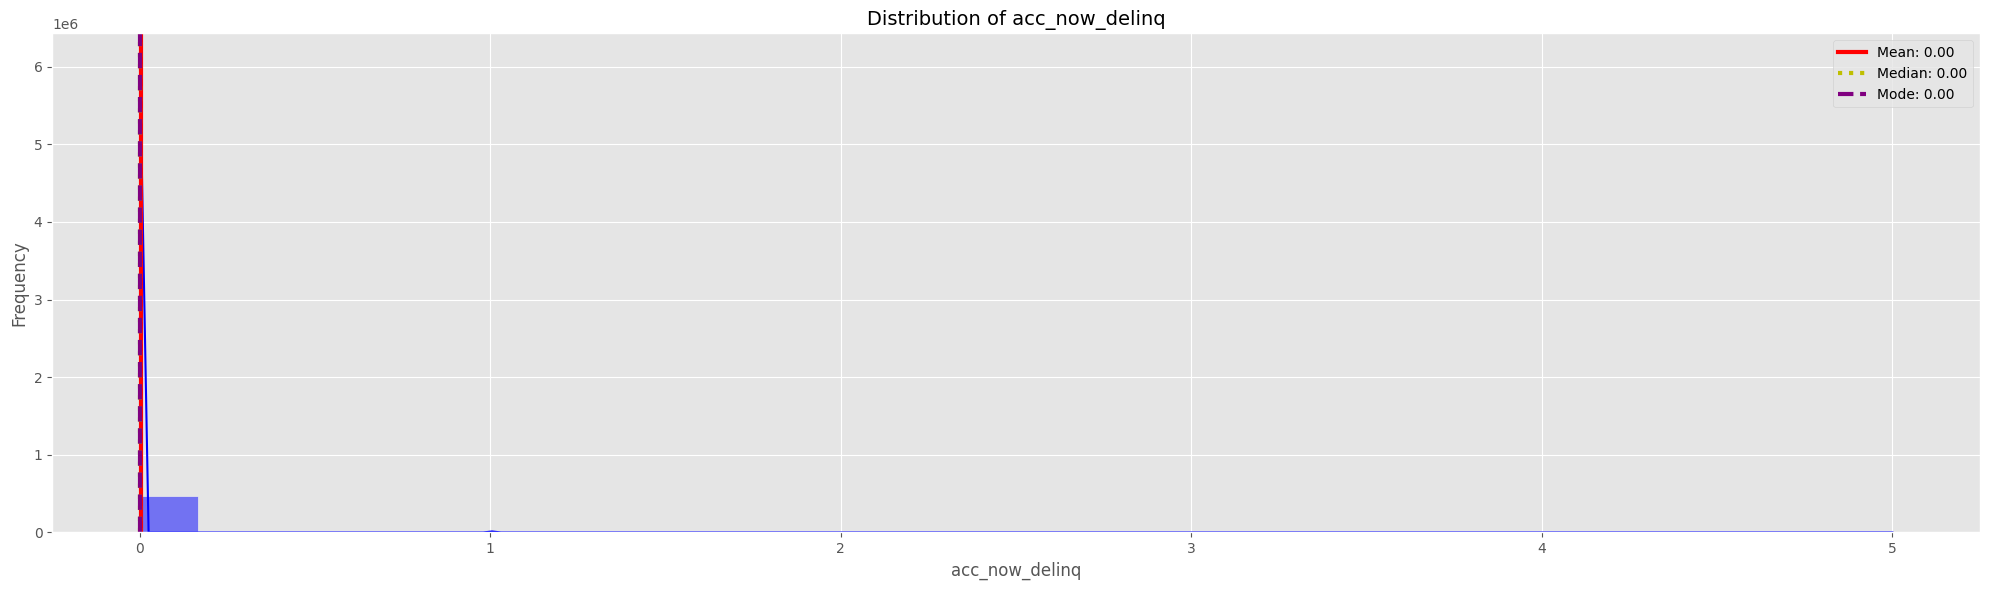

Ringkasan statistik dari acc_now_delinq:
Rata-rata: 0.00
Standar deviasi: 0.07
Median: 0.00
Mode: 0.00
----------------------------------------


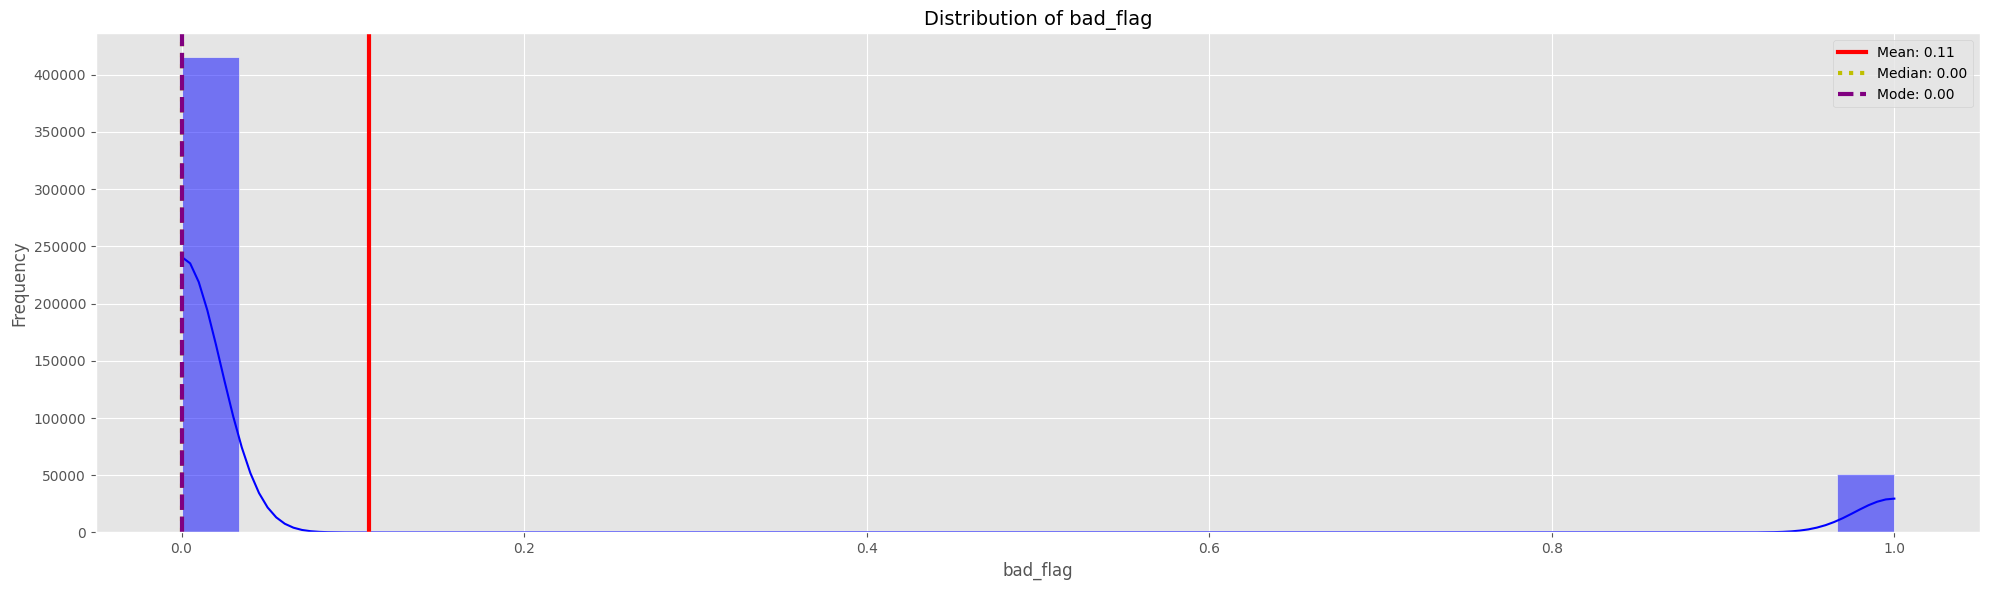

Ringkasan statistik dari bad_flag:
Rata-rata: 0.11
Standar deviasi: 0.31
Median: 0.00
Mode: 0.00
----------------------------------------


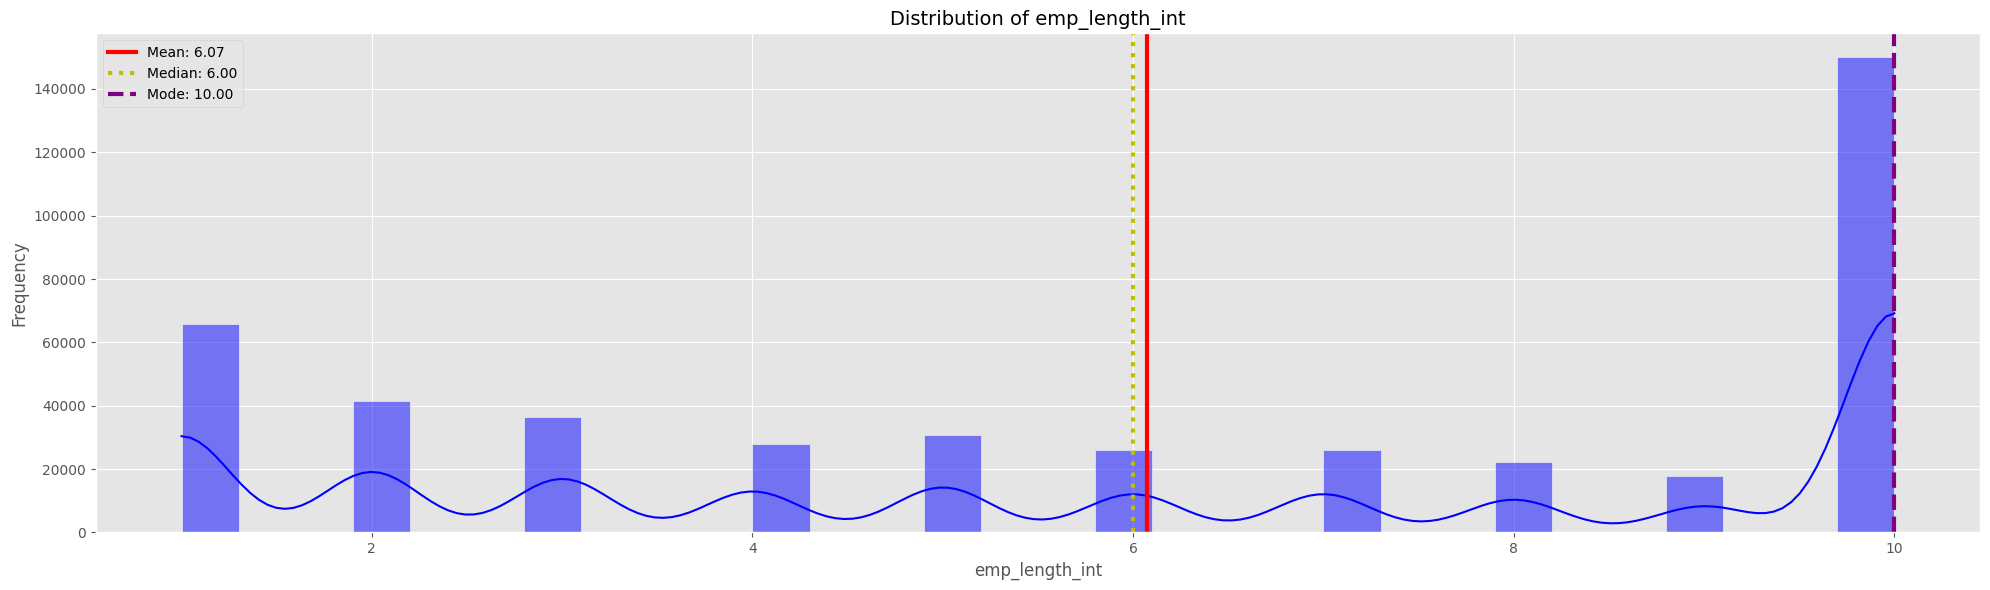

Ringkasan statistik dari emp_length_int:
Rata-rata: 6.07
Standar deviasi: 3.50
Median: 6.00
Mode: 10.00
----------------------------------------


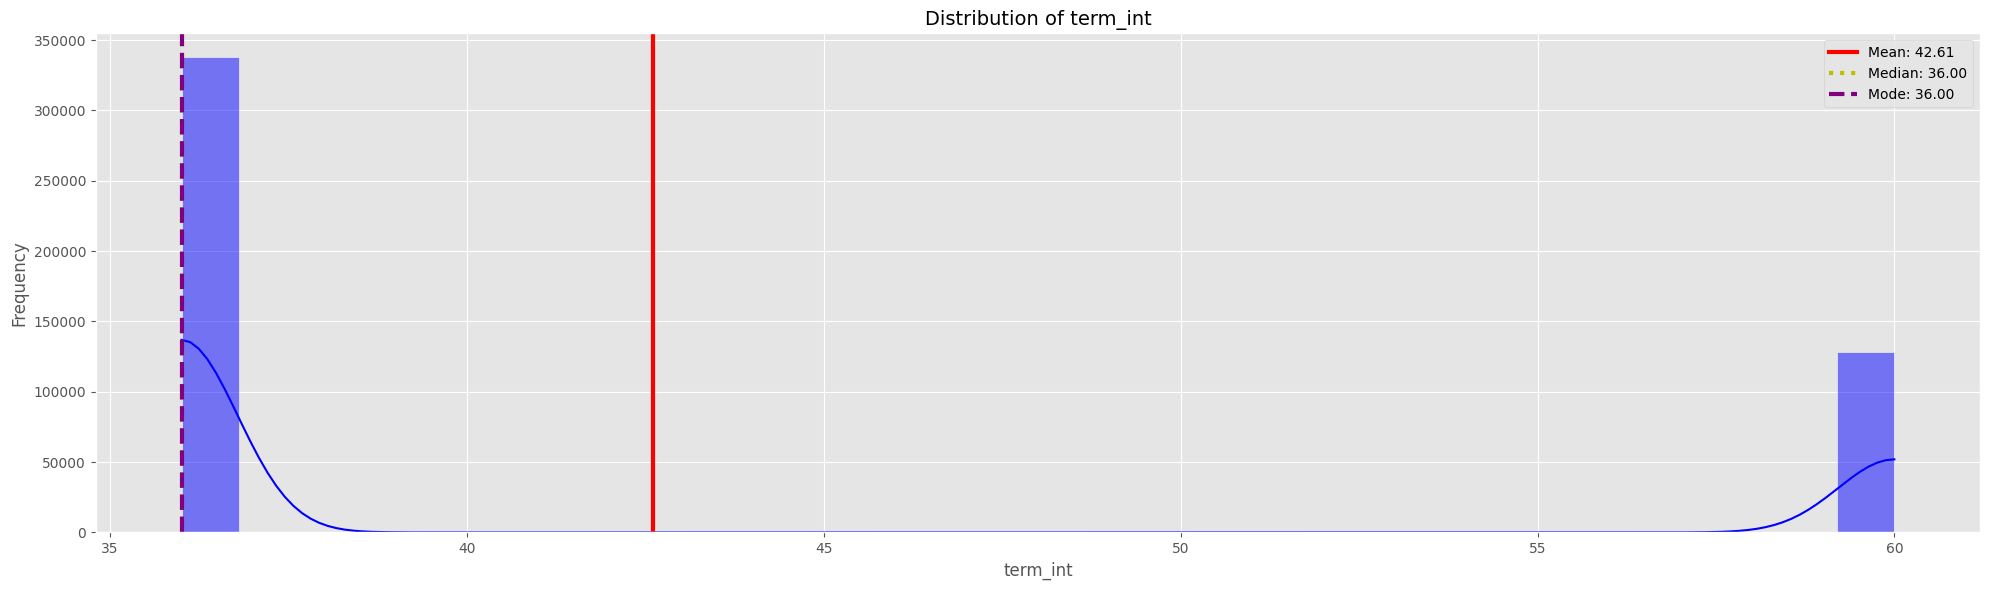

Ringkasan statistik dari term_int:
Rata-rata: 42.61
Standar deviasi: 10.72
Median: 36.00
Mode: 36.00
----------------------------------------


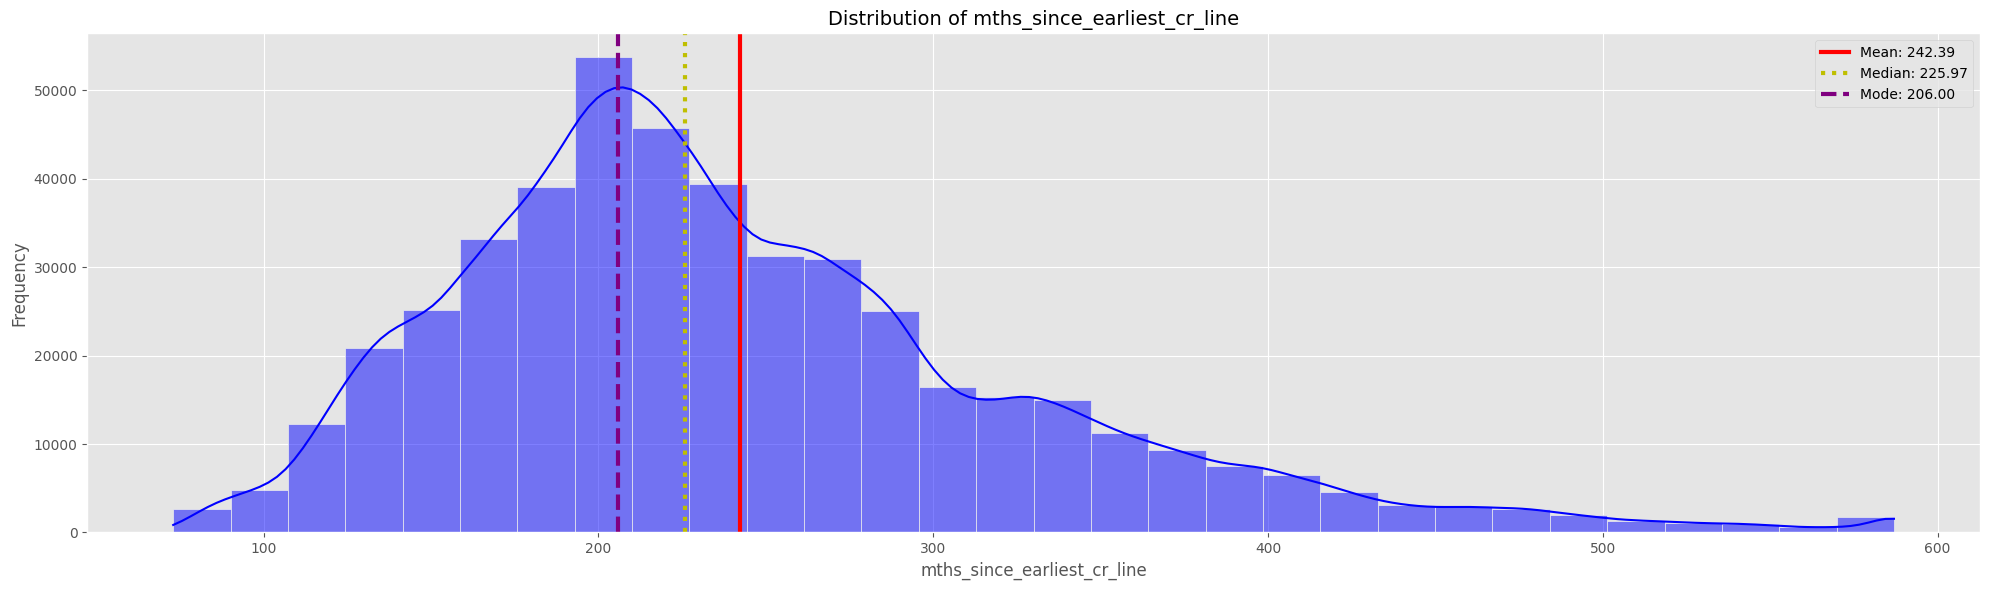

Ringkasan statistik dari mths_since_earliest_cr_line:
Rata-rata: 242.39
Standar deviasi: 86.46
Median: 225.97
Mode: 206.00
----------------------------------------


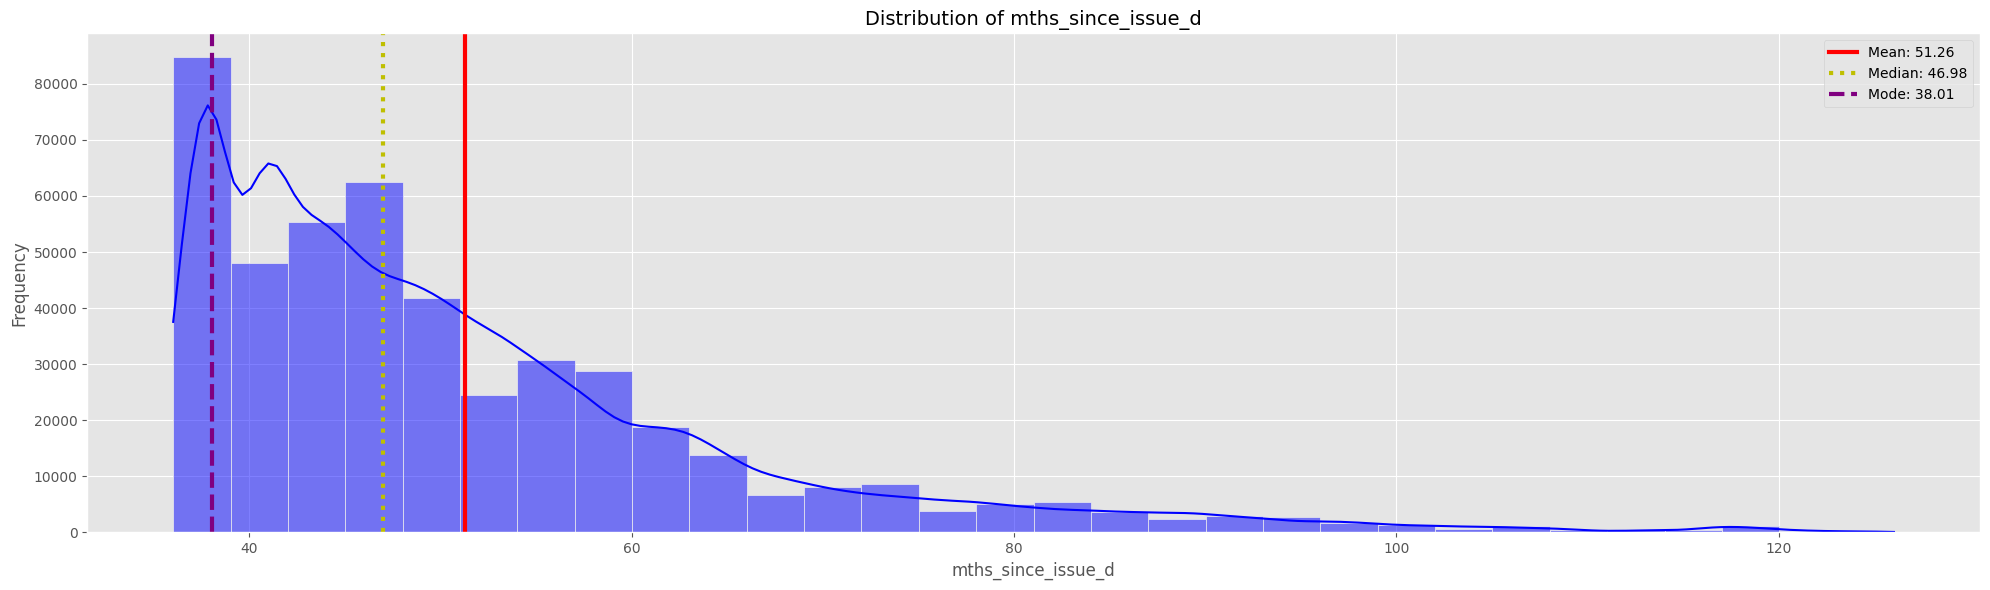

Ringkasan statistik dari mths_since_issue_d:
Rata-rata: 51.26
Standar deviasi: 14.34
Median: 46.98
Mode: 38.01
----------------------------------------


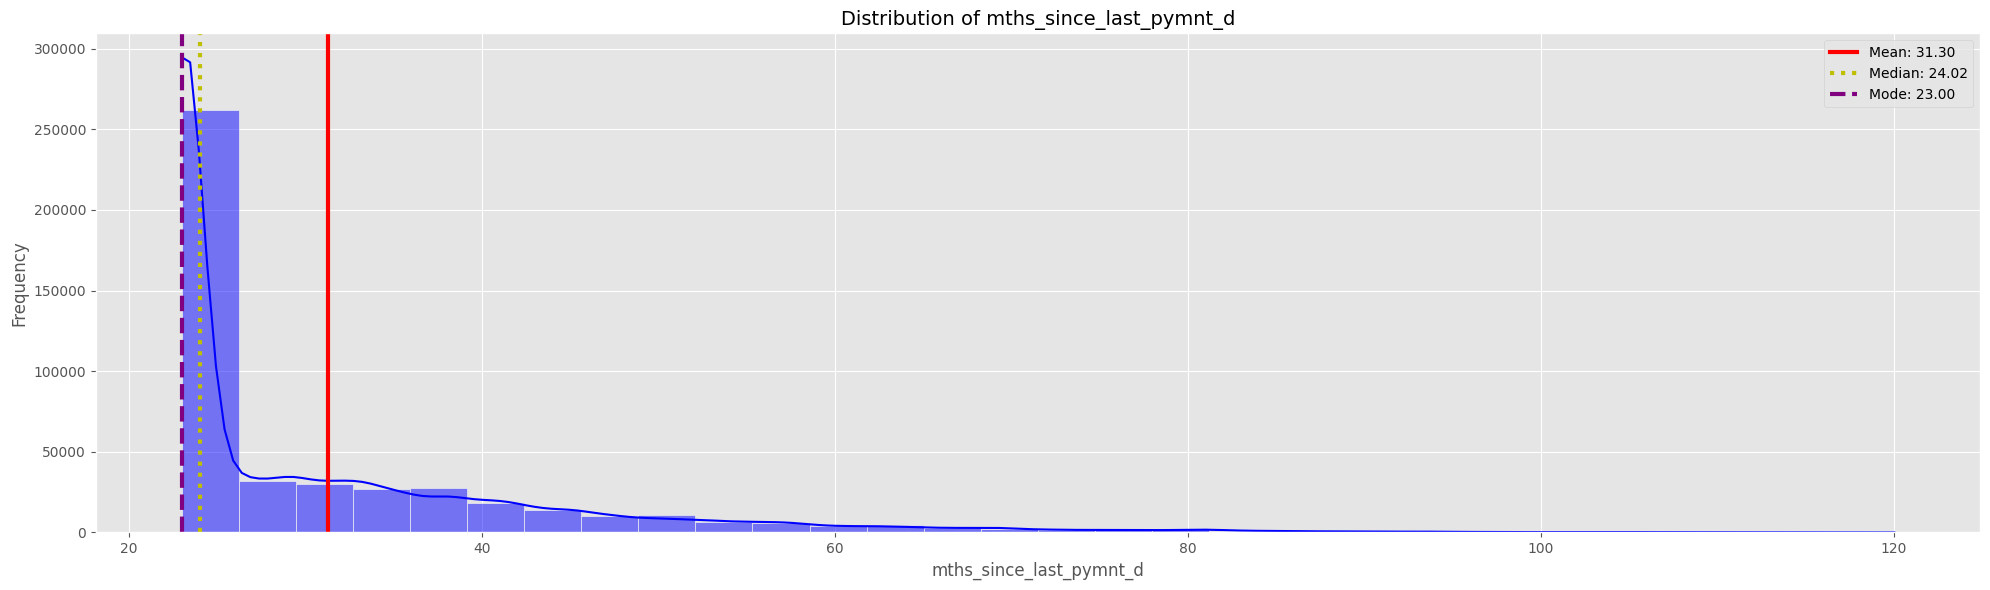

Ringkasan statistik dari mths_since_last_pymnt_d:
Rata-rata: 31.30
Standar deviasi: 12.81
Median: 24.02
Mode: 23.00
----------------------------------------


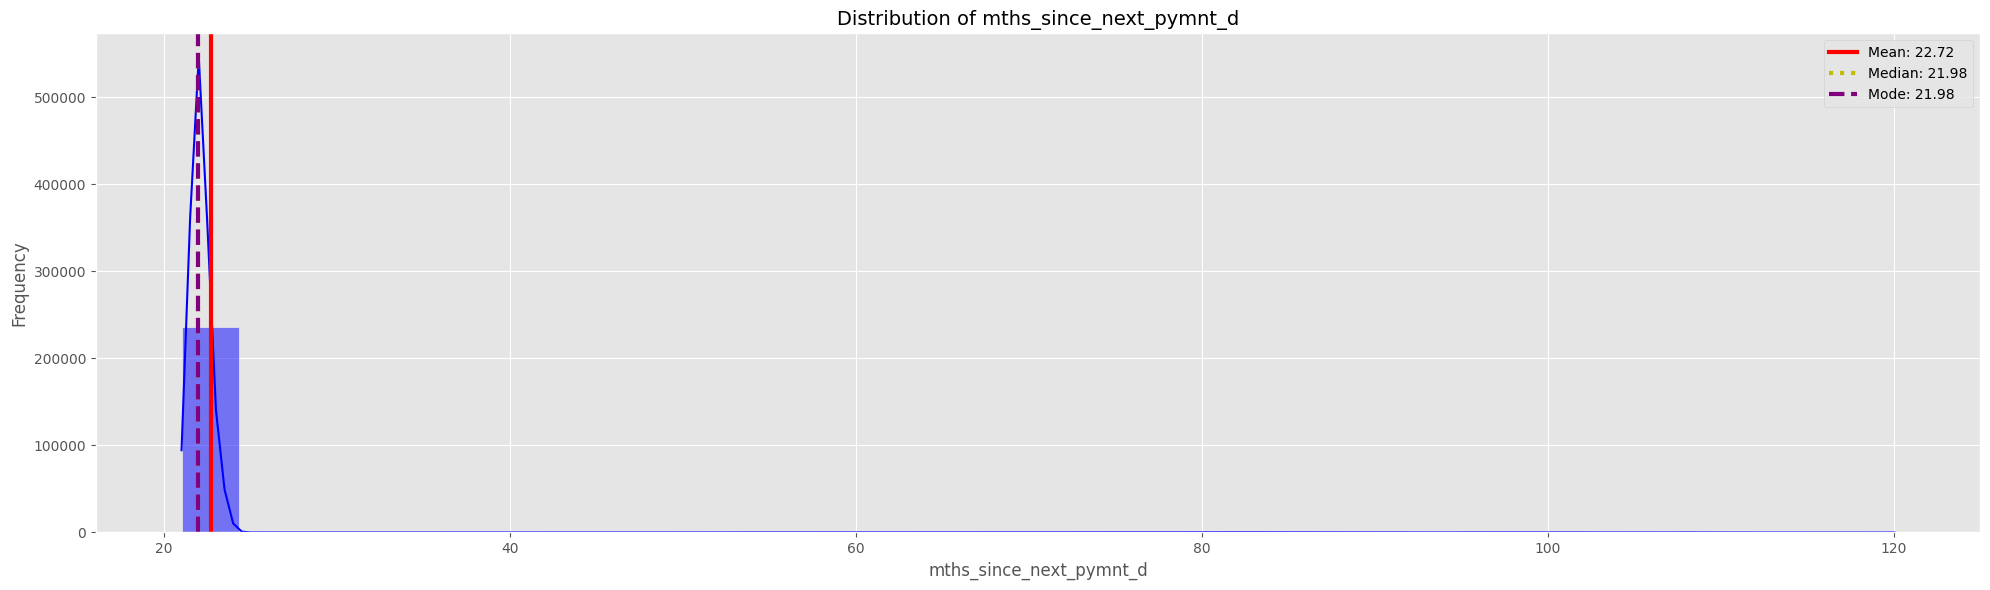

Ringkasan statistik dari mths_since_next_pymnt_d:
Rata-rata: 22.72
Standar deviasi: 6.09
Median: 21.98
Mode: 21.98
----------------------------------------


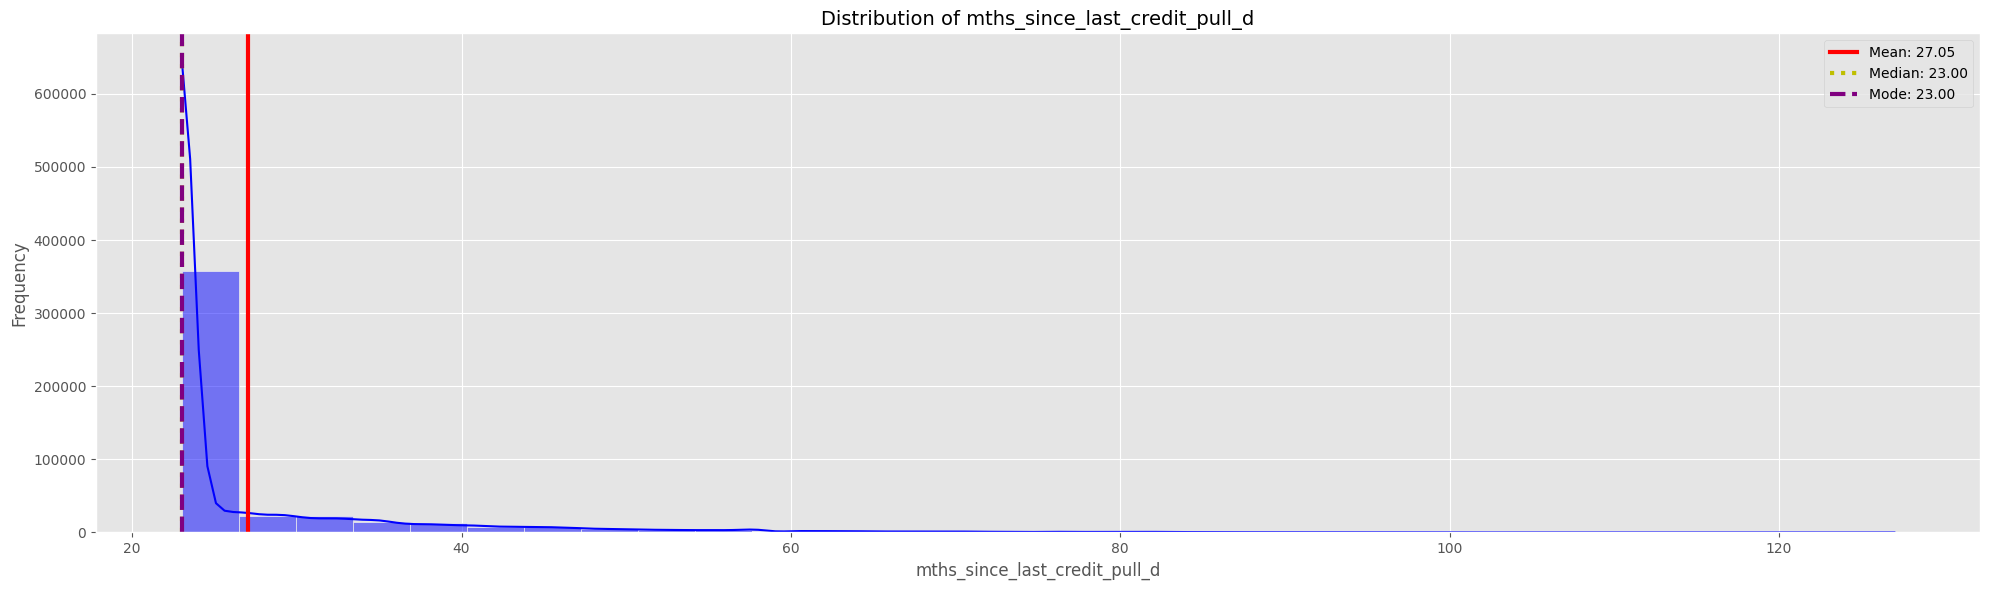

Ringkasan statistik dari mths_since_last_credit_pull_d:
Rata-rata: 27.05
Standar deviasi: 9.64
Median: 23.00
Mode: 23.00
----------------------------------------


In [ ]:
# Menggunakan style 'ggplot' untuk plot
plt.style.use('ggplot')

# Looping melalui setiap kolom numerik
for column in data.select_dtypes(exclude='object').columns.tolist():
    # Menghitung statistik deskriptif
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().iloc[0]  # Mengambil mode pertama
    std = data[column].std()

    # Membuat figure dengan ukuran yang lebih lebar
    plt.figure(figsize=(20, 6))

    # Plot: Histogram dengan KDE
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label=f'Mean: {average:.2f}')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label=f'Mode: {mode:.2f}')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.legend()

    # Menampilkan plot
    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

    # Menampilkan ringkasan statistik
    print(f'Ringkasan statistik dari {column}:')
    print(f'Rata-rata: {average:.2f}')
    print(f'Standar deviasi: {std:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Mode: {mode:.2f}')
    print('-' * 40)

### Bivariate analysis

#### Categorical Data

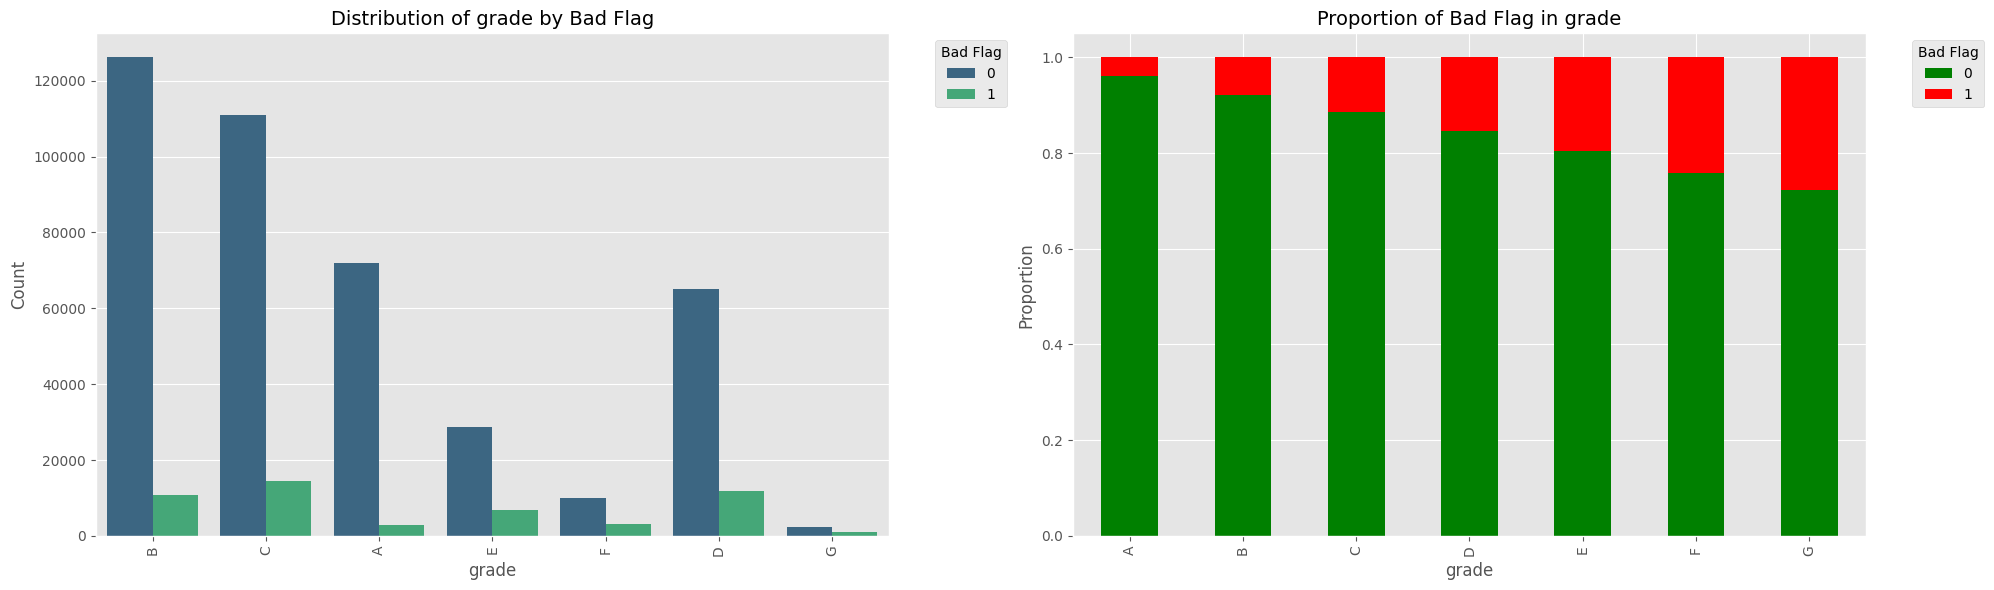

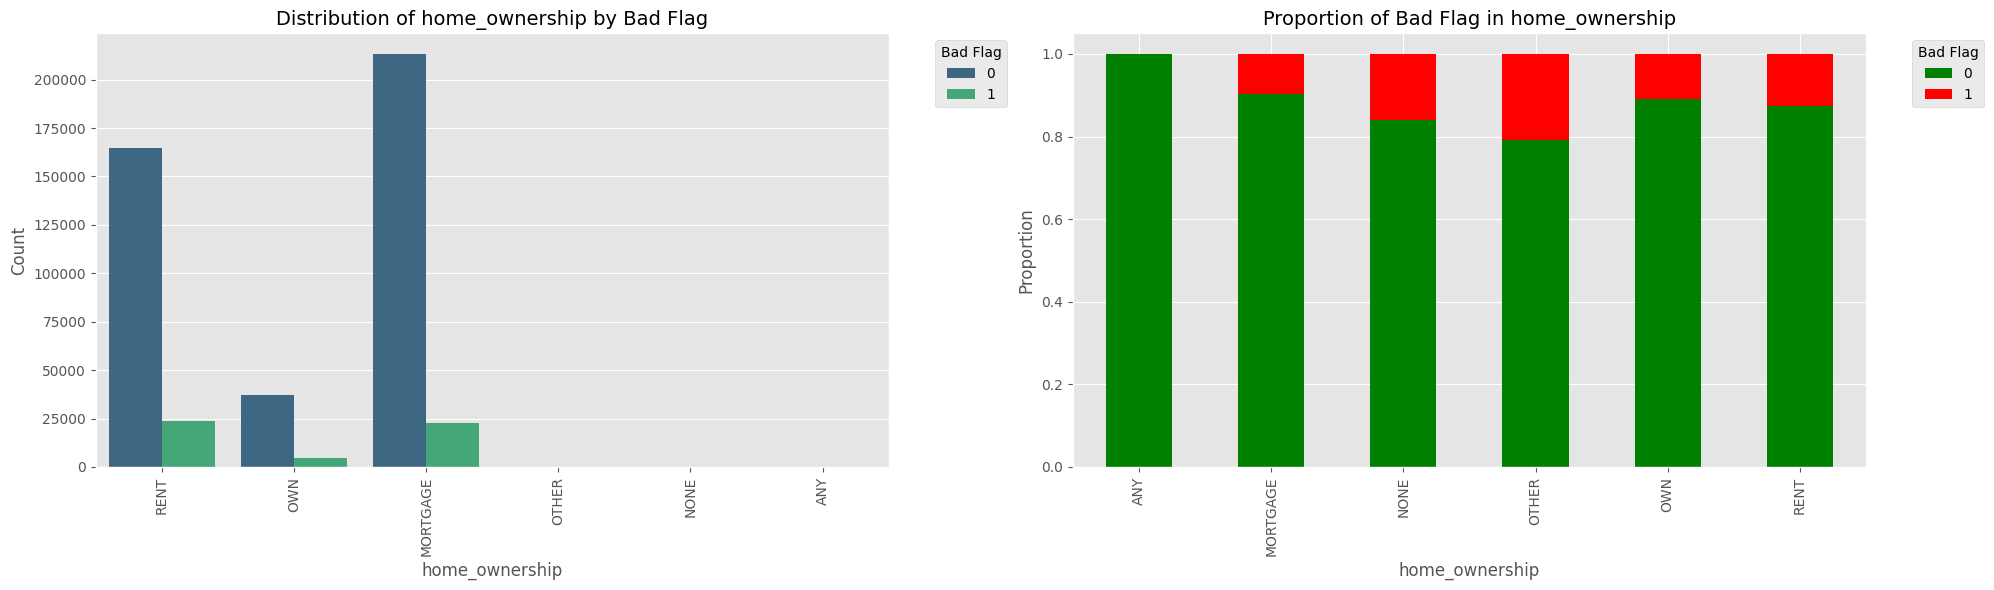

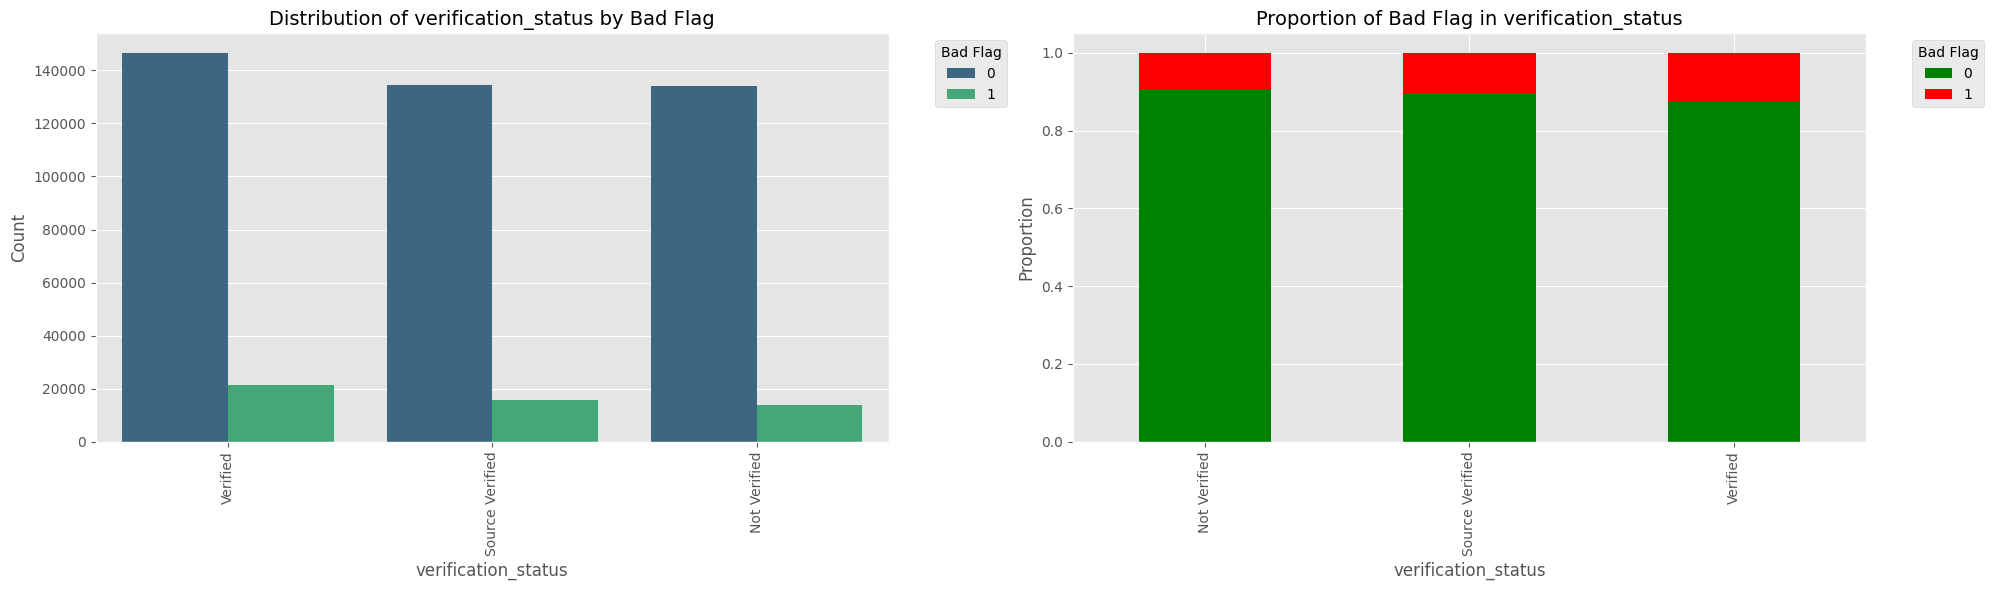

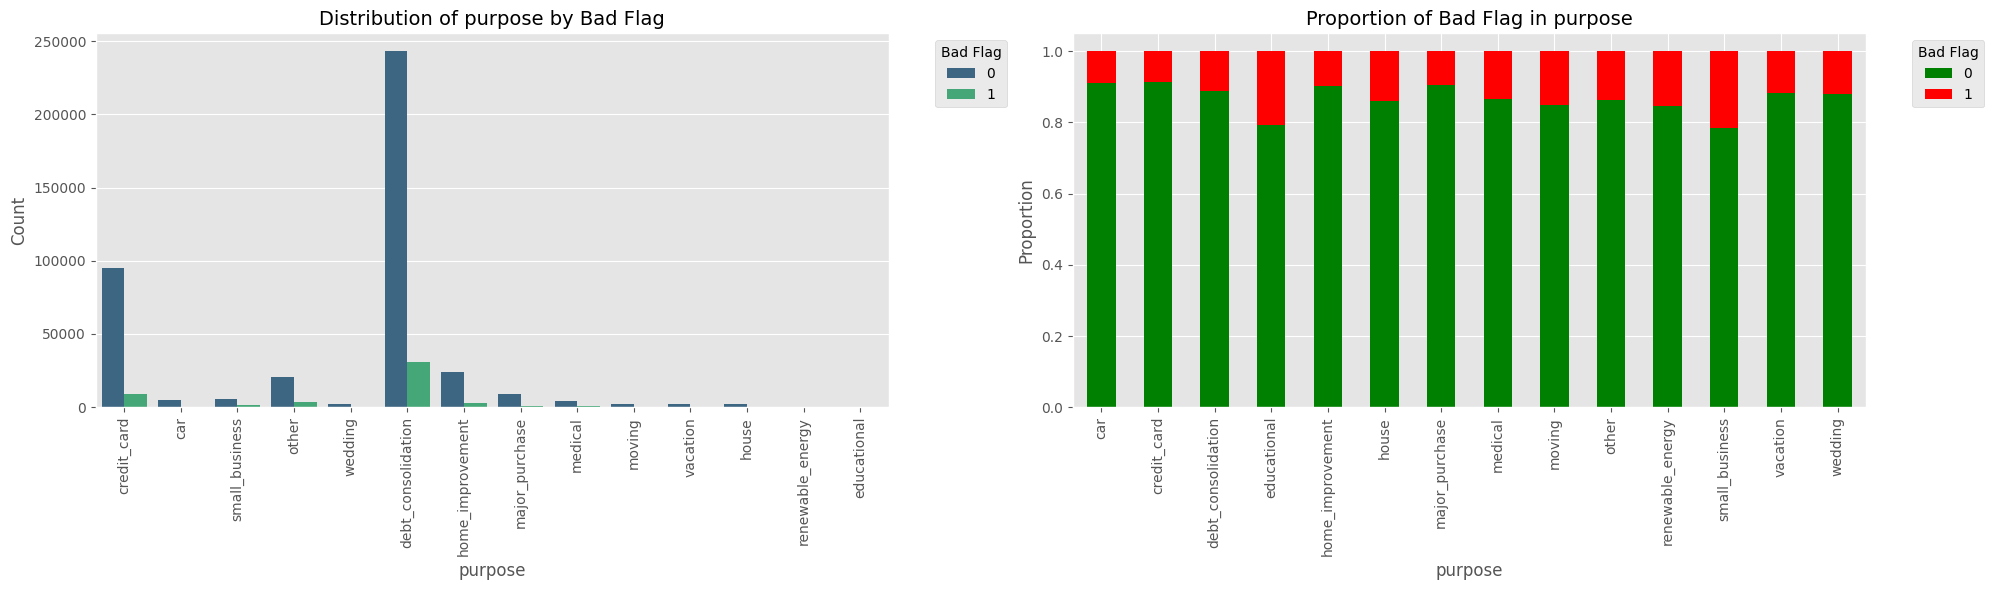

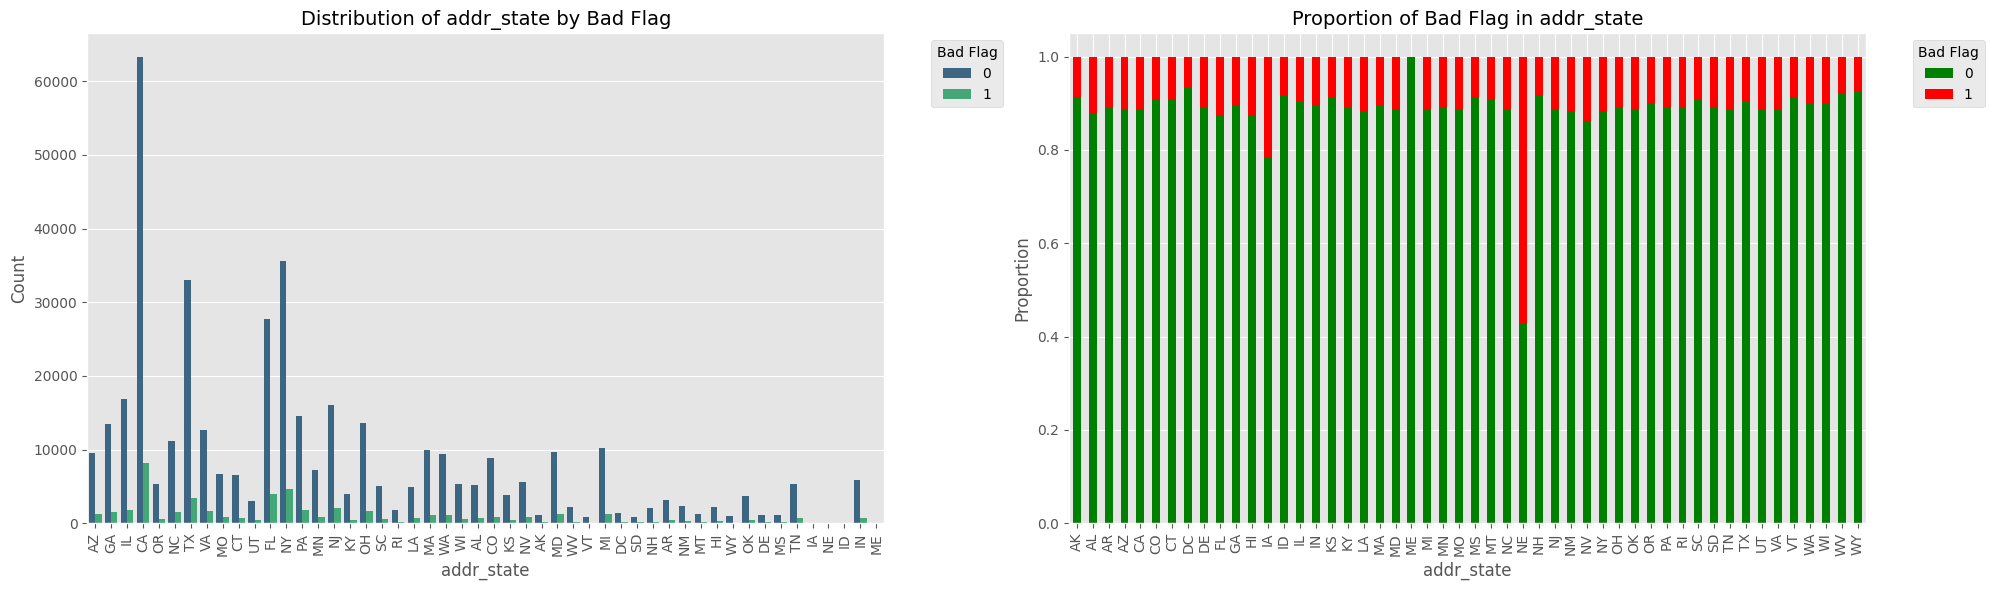

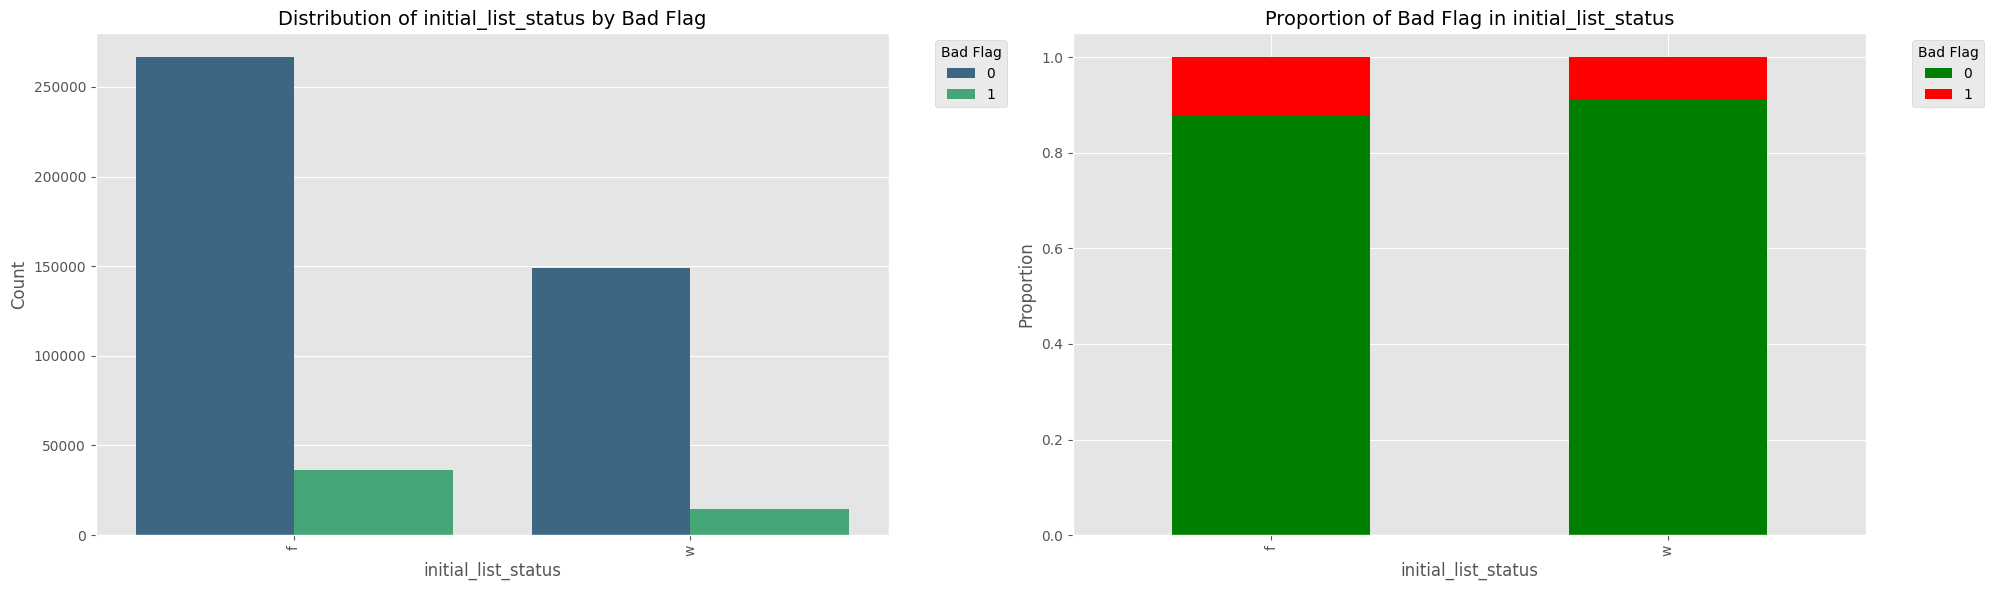

In [ ]:
# Menggunakan style 'ggplot' untuk plot
plt.style.use('ggplot')

# Looping melalui setiap kolom kategorikal
for column in cat_var:
    # Membuat figure dengan ukuran yang lebih lebar
    plt.figure(figsize=(20, 6))

    # Plot 1: Countplot dengan hue untuk 'bad_flag'
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
    sns.countplot(x=data[column], hue=data['bad_flag'], palette='viridis')
    plt.title(f'Distribution of {column} by Bad Flag', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title='Bad Flag', bbox_to_anchor=(1.05, 1), loc='upper left')  # Memindahkan legenda ke luar plot

    # Plot 2: Proporsi 'bad_flag' dalam setiap kategori
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
    prop_data = data.groupby(column)['bad_flag'].value_counts(normalize=True).unstack()
    prop_data.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
    plt.title(f'Proportion of Bad Flag in {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title='Bad Flag', bbox_to_anchor=(1.05, 1), loc='upper left')  # Memindahkan legenda ke luar plot

    # Menampilkan plot
    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

## Data Preprocessing

### Check Missing Value

In [ ]:
# menghitung presentase nilai yang hilang untuk setiap fitur
check_missing = data.isnull().sum() * 100 / data.shape[0]

# pilih fitur yang hilang saja
missing_values = check_missing[check_missing > 0].sort_values(ascending = False)

# menampilkan hasil
print('presentase nilai yang hilang untuk setiap fitur')
print(missing_values)


presentase nilai yang hilang untuk setiap fitur
mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
mths_since_next_pymnt_d          48.728567
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
delinq_2yrs                       0.006219
pub_rec                           0.006219
inq_last_6mths                    0.006219
open_acc                          0.006219
acc_now_delinq                    0.006219
total_acc                         0.006219
mths_since_earliest_cr_line       0.006219
annual_inc                        0.000858
dtype: float64


In [ ]:
data.drop('mths_since_last_record',axis = 1, inplace = True)

### Data Imputation

In [ ]:
# Mengisi nilai yang hilang dengan median untuk kolom 'annual_inc'
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)

# Mengisi nilai yang hilang dengan 0 untuk beberapa kolom
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)

# Mengisi nilai yang hilang dengan -1 untuk kolom 'mths_since_last_delinq'
data['mths_since_last_delinq'].fillna(-1, inplace=True)

data['mths_since_last_pymnt_d'].fillna(0, inplace=True)
data['mths_since_next_pymnt_d'].fillna(0, inplace=True)
data['mths_since_last_credit_pull_d'].fillna(0, inplace=True)

<ipython-input-172-7b4bfa01854b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
<ipython-input-172-7b4bfa01854b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var :
  data[column] = label.fit_transform(data[column])

In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,1,5,24000.0,2,1,...,0.0,0.0,0,10.0,36.0,394.973306,72.016427,34.989733,0.000000,23.0
1,2500,2500,2500.0,15.27,59.83,2,5,30000.0,1,0,...,0.0,0.0,1,1.0,60.0,224.032854,72.016427,56.016427,0.000000,51.0
2,2400,2400,2400.0,15.96,84.33,2,5,12252.0,0,11,...,0.0,0.0,0,10.0,36.0,192.985626,72.016427,42.020534,0.000000,23.0
3,10000,10000,10000.0,13.49,339.31,2,5,49200.0,1,9,...,0.0,0.0,0,10.0,36.0,261.979466,72.016427,34.989733,0.000000,35.0
4,3000,3000,3000.0,12.69,67.79,1,5,80000.0,1,9,...,0.0,0.0,0,1.0,60.0,262.997947,72.016427,22.997947,21.979466,23.0


### Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE
X = data.drop('bad_flag', axis =1)
y = data['bad_flag']

oversampling = SMOTE(random_state = 12, sampling_strategy=1)

In [ ]:
# menghitung presentase nilai yang hilang untuk setiap fitur
check_missing = data.isnull().sum() * 100 / data.shape[0]

# pilih fitur yang hilang saja
missing_values = check_missing[check_missing > 0].sort_values(ascending = False)

# menampilkan hasil
print('presentase nilai yang hilang untuk setiap fitur')
print(missing_values)

presentase nilai yang hilang untuk setiap fitur
Series([], dtype: float64)


In [ ]:
# fit oversampling
X ,y = oversampling.fit_resample(X,y)

In [ ]:
y.value_counts()

,count
bad_flag,
0,415317
1,415317


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# menampilkan bentuk dari data pelatihan dan data uji
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (664507, 40)
Shape of X_test: (166127, 40)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

In [ ]:
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,-0.653791,-0.651558,-0.637456,-0.736228,-0.572745,-0.734710,-1.046928,-0.156183,-1.214543,-0.717585,...,-0.377302,-0.089529,-0.061863,0.675459,-0.694047,0.947581,-0.833317,-0.882789,1.111125,-0.560544
1,-0.292901,-0.290114,-0.277395,-0.029192,-0.093114,0.063035,-1.046928,-0.195878,0.049720,-0.284758,...,-0.350725,-0.089529,-0.061863,1.264903,-0.694047,0.658886,-0.690104,-0.882789,1.111125,-0.560544
2,1.698011,1.703851,1.708987,0.206108,1.960206,0.063035,-1.046928,1.052520,0.049720,-0.717585,...,-0.236948,-0.089529,-0.061863,-0.016797,-0.074507,0.398180,-0.696347,-0.661072,1.134129,-0.560544
3,-1.074830,-1.073243,-1.057527,-0.898108,-1.056993,-0.734710,-1.046928,0.109775,-1.214543,-0.284758,...,-0.404135,-0.089529,-0.061863,1.264903,-0.694047,0.182397,-0.762884,-0.882789,1.111125,-0.560544
4,-0.794539,-0.792521,-0.777805,1.068742,-0.611867,0.860780,1.179358,0.101836,0.049720,1.879377,...,-0.379470,-0.089529,-0.061863,0.155083,-0.694047,1.060828,-0.137377,0.313747,-0.692829,0.636124


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test)

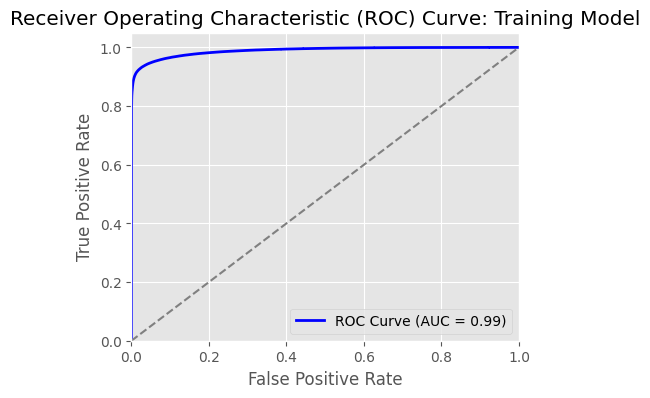

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Memprediksi probabilitas untuk set pelatihan
y_prob = logreg.predict_proba(X_train_scaled)[:, 1]

# Menghitung kurva ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Membuat plot kurva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Prediksi probabilitas untuk data pelatihan dan testing
y_train_prob = logreg.predict_proba(X_train_scaled)[:, 1]
y_test_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Hitung AUC untuk data pelatihan dan testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Hitung akurasi untuk data pelatihan dan testing
train_accuracy = accuracy_score(y_train, logreg.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))

# Tampilkan hasil
print(f"AUC (Training): {train_auc:.4f}")
print(f"AUC (Testing): {test_auc:.4f}")
print(f"Accuracy (Training): {train_accuracy:.4f}")
print(f"Accuracy (Testing): {test_accuracy:.4f}")

# Analisis overfitting
if train_auc > test_auc + 0.1 or train_accuracy > test_accuracy + 0.1:
    print("Warning: Model mungkin mengalami overfitting!")
else:
    print("Model tampaknya tidak overfitting.")

AUC (Training): 0.9884
AUC (Testing): 0.9879
Accuracy (Training): 0.9524
Accuracy (Testing): 0.9518
Model tampaknya tidak overfitting.
